# Introduction 

**EduFoundation International** is an international humanitarian foundation that is committed to fighting poverty and providing African Countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 1 million. Now the CEO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 



And this is where we  come in as a data analyst. Our job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then suggest the countries which the CEO needs to focus on the most. 

# Objectives

My main task is to cluster the countries by the factors mentioned above and then present the solution. The following approach is suggested :


- Also, We need to perform visualisations on the clusters that have been formed.  


- Both K-means and Hierarchical may give different results because of previous analysis (whether We chose to keep or remove the outliers, how many clusters We chose,  etc.) Hence, there might be some subjectivity in the final number of countries that We think should be reported back to the CEO since they depend upon the preceding analysis as well. Here, make sure that We report back at least 5 countries which are in direst need of aid from the analysis work that we perform.

# Importing our libraries and Data

The new_dfsets containing those socio-economic factors and the corresponding new_df dictionary are provided.

In [15]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks

# Hierarchicalclu stering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# import all machine learning libraries 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
# from numpy.random import uniform
# from math import isnan

# import warnings
import warnings
warnings.filterwarnings('ignore')

# Data Preparation

## Data Loading

In [185]:
Data= pd.read_csv("Country-data.csv")
Data

,country,child_mort,exports,health,imports,income,inflation,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,12200
...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,1310


## Mapping Country Column into Continent

In [186]:
import country_converter as coco

# Initialize the country converter
converter = coco.CountryConverter()

# Function to get continent based on country
def get_continent(country):
    try:
        return converter.convert(country, to='continent')
    except coco.errors.CountryNotFoundException:
        return 'Unknown'

# Apply the function to the 'country' column in your new_dfFrame
Data['continent'] = Data['country'].apply(get_continent)

# Display the new_dfFrame with the added 'continent' column
print(Data[['country', 'continent']])


                 country continent
0            Afghanistan      Asia
1                Albania    Europe
2                Algeria    Africa
3                 Angola    Africa
4    Antigua and Barbuda   America
..                   ...       ...
162              Vanuatu   Oceania
163            Venezuela   America
164              Vietnam      Asia
165                Yemen      Asia
166               Zambia    Africa

[167 rows x 2 columns]


In [188]:

# Filter  African continent
new_df = Data[Data['continent'] == 'Africa']
new_df.head()



,country,child_mort,exports,health,imports,income,inflation,gdpp,continent
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,4460,Africa
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,3530,Africa
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,758,Africa
21,Botswana,52.5,43.6,8.30,51.3,13300,8.920,6350,Africa
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,575,Africa


## Discription of the Columns

In [189]:
word=pd.read_csv("data-dictionary.csv")
word

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,gdpp,The GDP per capita. Calculated as the Total GD...


## Data Inspection

In [192]:
new_df.shape

(47, 9)

In [193]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 2 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     47 non-null     object 
 1   child_mort  47 non-null     float64
 2   exports     47 non-null     float64
 3   health      47 non-null     float64
 4   imports     47 non-null     float64
 5   income      47 non-null     int64  
 6   inflation   47 non-null     float64
 7   gdpp        47 non-null     int64  
 8   continent   47 non-null     object 
dtypes: float64(5), int64(2), object(2)
memory usage: 3.7+ KB


In [194]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,47.0,82.155319,37.912908,14.40,59.100,83.10,111.00,160.0
exports,47.0,33.972553,20.200923,4.79,20.200,28.60,42.35,93.8
health,47.0,6.014894,2.508141,2.46,4.445,5.21,6.76,13.1
imports,47.0,43.938298,19.297765,17.20,30.450,42.70,51.50,108.0
income,47.0,5627.510638,7330.458894,609.00,1390.000,2380.00,6170.00,33700.0
inflation,47.0,10.730553,15.591548,-4.21,2.790,6.81,15.15,104.0
gdpp,47.0,2644.617021,3600.969830,231.00,554.500,1000.00,3070.00,17100.0


## Data Cleaning

### Null Count

In [195]:
new_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
gdpp          0
continent     0
dtype: int64

There are no missing / Null values either in columns or rows

# Exploratory Data Analytics

## Data Preparation

### Derived Metrices

Deducing imports,exports and health spending from percentage values to actual values of their GDP per capita .Because the percentage values don't give a clear picture of that country. 

In [196]:
# Converting exports,imports and health spending percentages to absolute values.

new_df['exports'] = new_df['exports'] * new_df['gdpp']/100
new_df['imports'] = new_df['imports'] * new_df['gdpp']/100
new_df['health'] = new_df['health'] * new_df['gdpp']/100

In [197]:
new_df.head()

,country,child_mort,exports,health,imports,income,inflation,gdpp,continent
2,Algeria,27.3,1712.640,185.982,1400.440,12900,16.100,4460,Africa
3,Angola,119.0,2199.190,100.605,1514.370,5900,22.400,3530,Africa
17,Benin,111.0,180.404,31.078,281.976,1820,0.885,758,Africa
21,Botswana,52.5,2768.600,527.050,3257.550,13300,8.920,6350,Africa
25,Burkina Faso,116.0,110.400,38.755,170.200,1430,6.810,575,Africa


## Univariate Analysis

We need to choose the countries that are in the direst need of aid. Hence, we need to identify those countries with using some socio-economic and health factors that determine the overall development of the country.


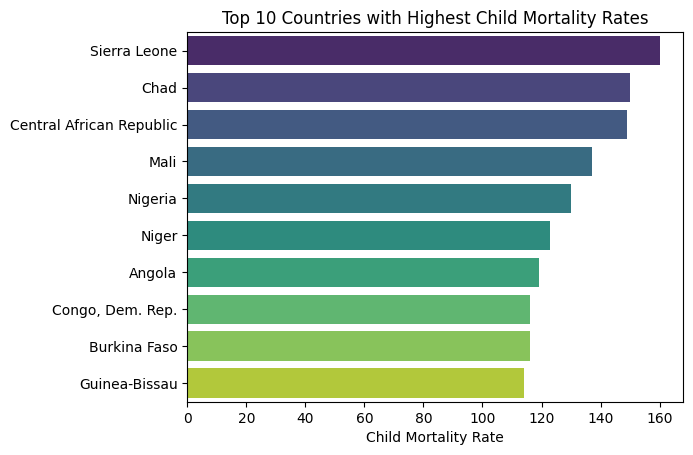

In [208]:

child_mort = new_df[['country', 'child_mort']].sort_values('child_mort', ascending=False).head(10)
ax = sns.barplot(x='child_mort', y='country', data=child_mort, palette='viridis')
ax.set(xlabel='Child Mortality Rate', ylabel='')
ax.set_title('Top 10 Countries with Highest Child Mortality Rates')
plt.show()





We are able to see how Child Mortality Rate is distributed across the all countries. 

Top 10 Countries having highest Child Mortality Rate are present in **Africa** having poor healthcare facilities.

We are able to see how Fertility Rate is distributed across the all countries.

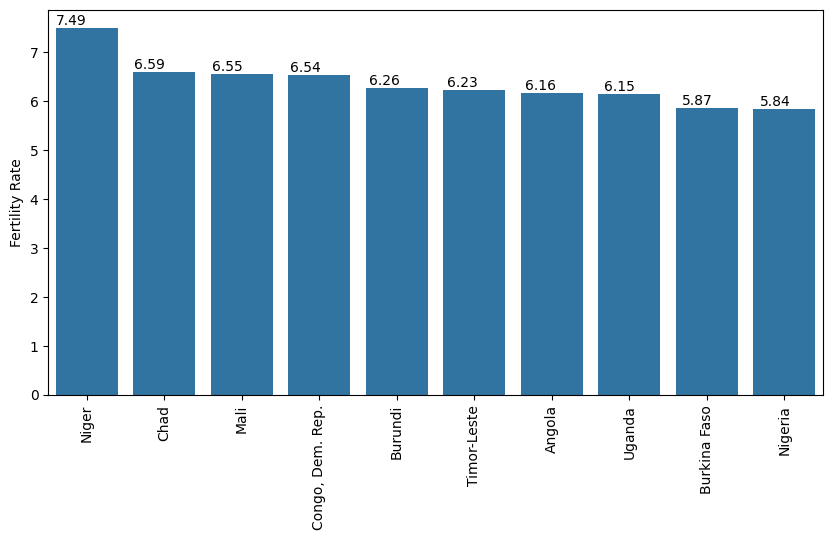

In [ ]:
plt.figure(figsize = (10,5))
total_fer_top10 = new_df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
ax = sns.barplot(x='country', y='total_fer', new_df= total_fer_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Fertility Rate')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having highest Fertility Rate are places where people are poorest in all.

In [ ]:
# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same
plt.figure(figsize = (32,5))
life_expec = new_df[['country','life_expec']].sort_values('life_expec', ascending = True)
ax = sns.barplot(x='country', y='life_expec', data = life_expec)
ax.set(xlabel = '', ylabel= 'Life Expectancy')
plt.xticks(rotation=90)
plt.show()

KeyError: "['life_expec'] not in index"

<Figure size 3200x500 with 0 Axes>

We are able to see how Life Expectancy is distributed across the all countries. Focus on the objective of the task.

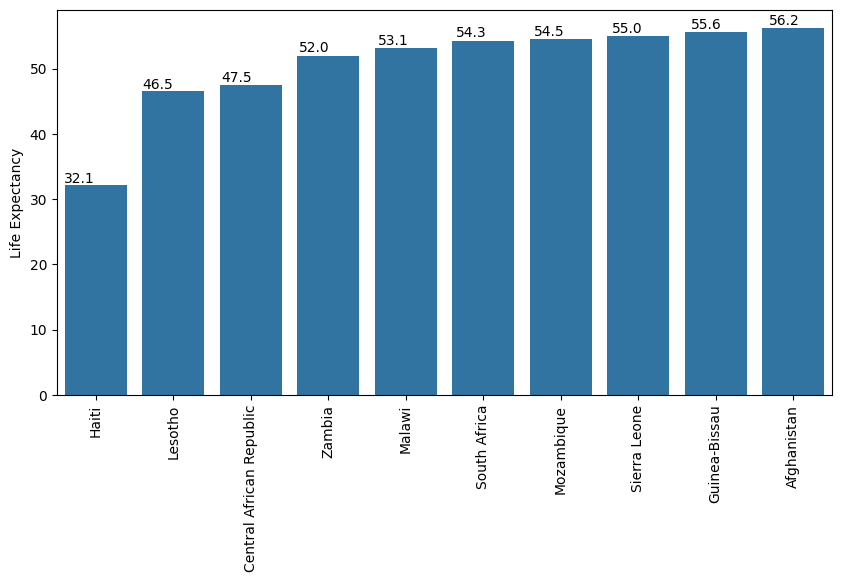

In [ ]:
plt.figure(figsize = (10,5))
life_expec_bottom10 = new_df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
ax = sns.barplot(x='country', y='life_expec', new_df= life_expec_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Life Expectancy')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having lowest Life Expectancy are places where healthcare system is not available or efficient.

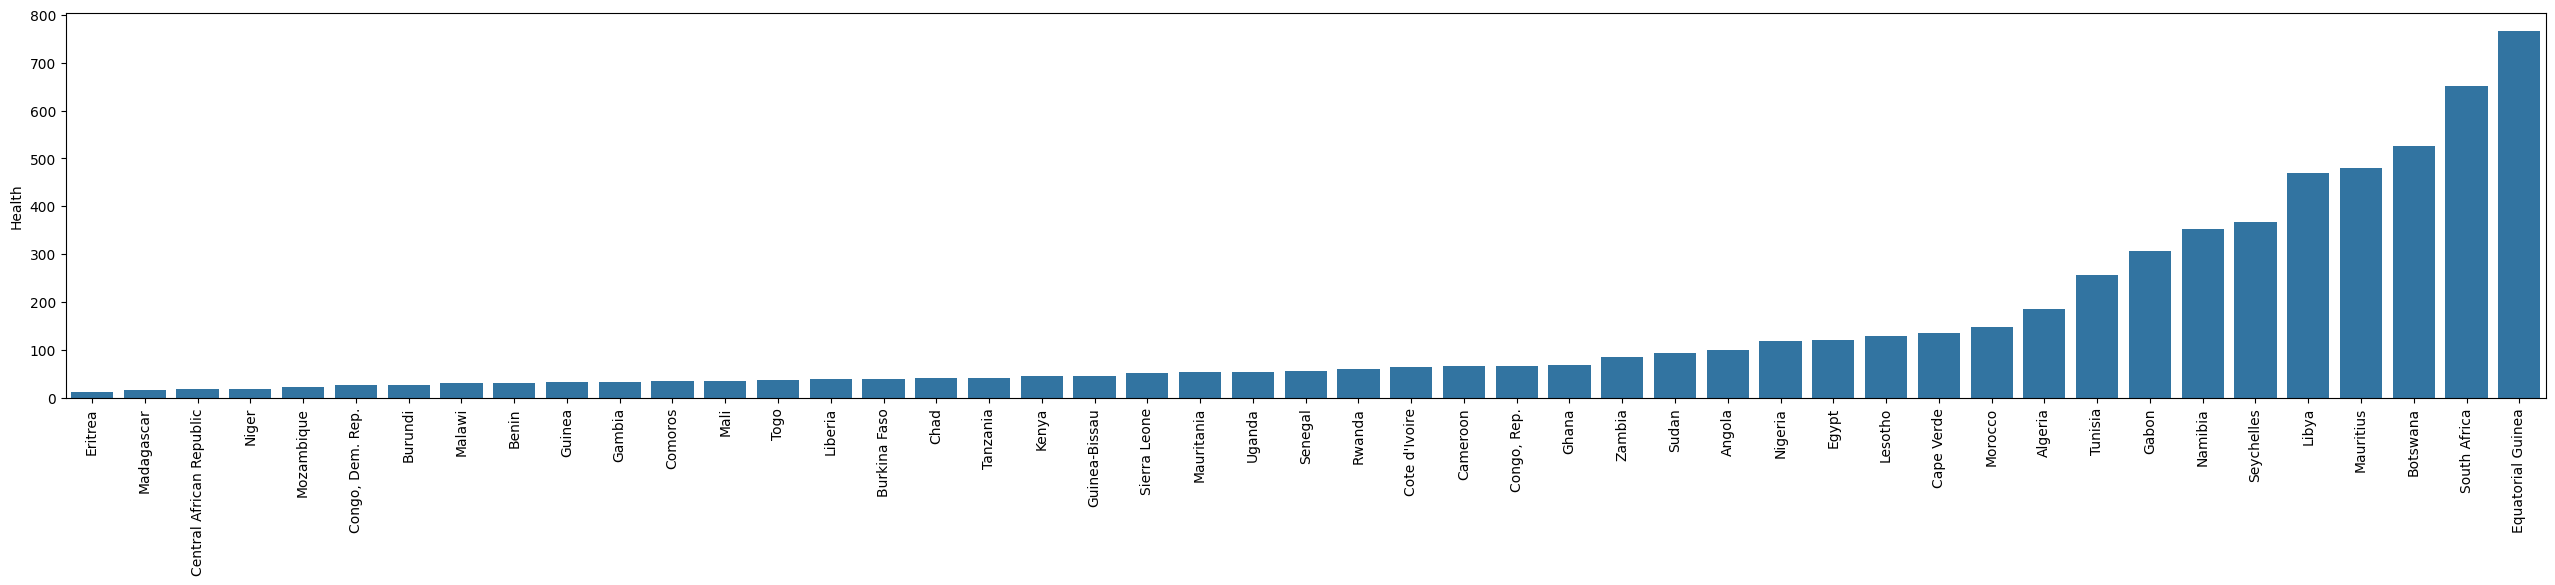

In [ ]:
# Health :Total health spending as %age of Total GDP.
plt.figure(figsize = (32,5))
health = new_df[['country','health']].sort_values('health', ascending = True)
ax = sns.barplot(x='country', y='health', data = health)
ax.set(xlabel = '', ylabel= 'Health')
plt.xticks(rotation=90)
plt.show()

We are able to see how Total health spending is distributed across the all countries. Focus on the objective of the task.

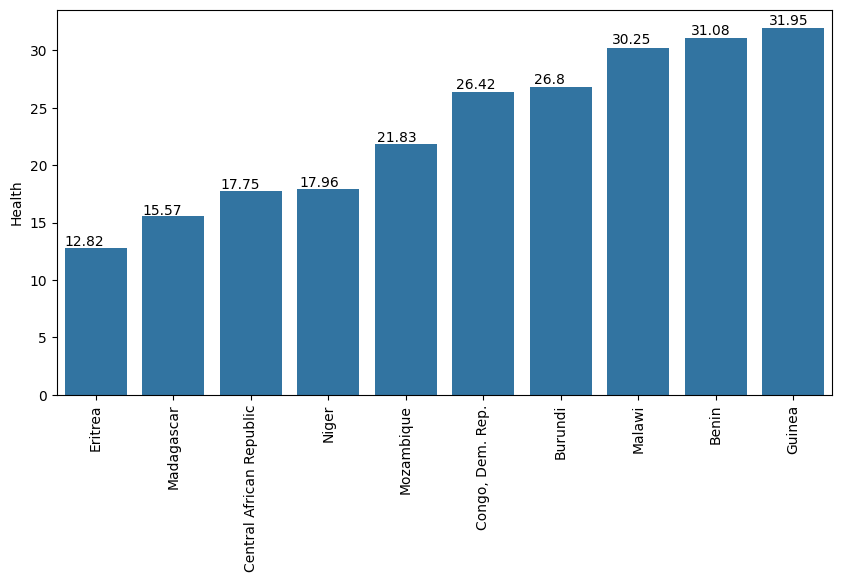

In [ ]:
plt.figure(figsize = (10,5))
health_bottom10 = new_df[['country','health']].sort_values('health', ascending = True).head(10)
ax = sns.barplot(x='country', y='health', data = health_bottom10)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Health')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having lowest health spending are mix bag of countries where per Capita income is very high or involved in unrest activities.

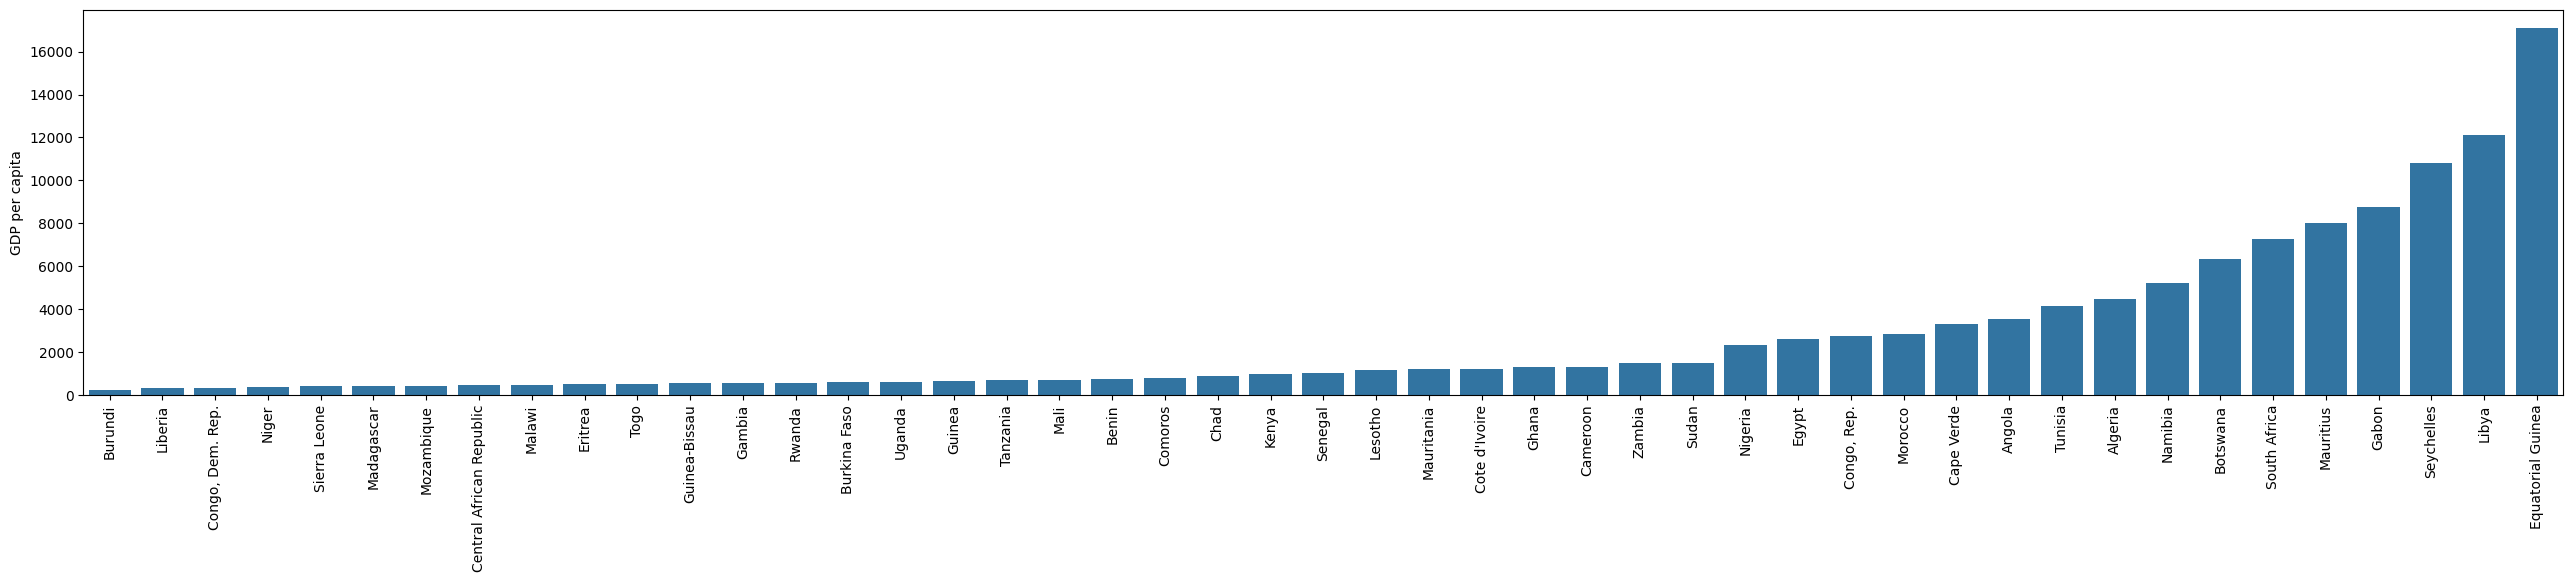

In [ ]:
# The GDP per capita : Calculated as the Total GDP divided by the total population.
plt.figure(figsize = (32,5))
gdpp = new_df[['country','gdpp']].sort_values('gdpp', ascending = True)
ax = sns.barplot(x='country', y='gdpp', data= gdpp)
ax.set(xlabel = '', ylabel= 'GDP per capita')
plt.xticks(rotation=90)
plt.show()

We are able to see how GDP per capita is distributed across the all countries. Focus on the objective of the task.

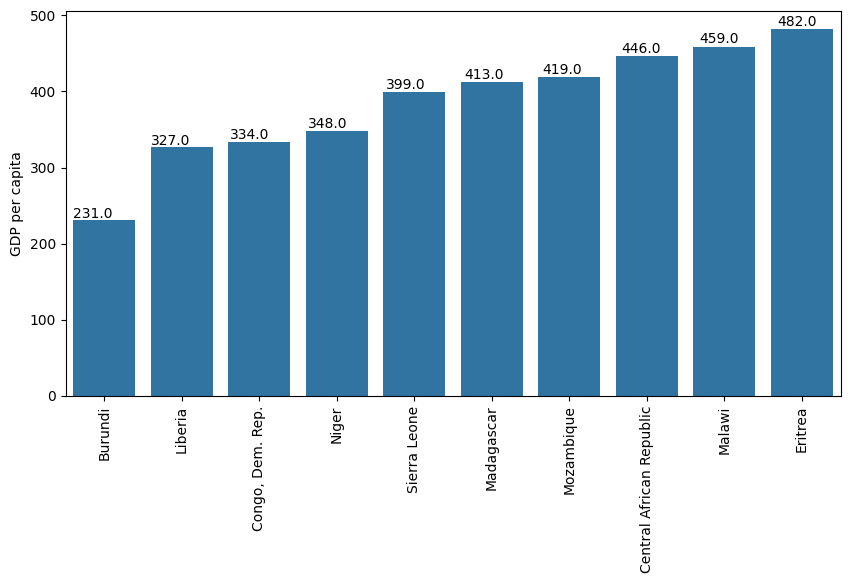

In [ ]:
plt.figure(figsize = (10,5))
gdpp_bottom10 = new_df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
ax = sns.barplot(x='country', y='gdpp', data= gdpp_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'GDP per capita')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having lowest GDP per capita are from East Africa

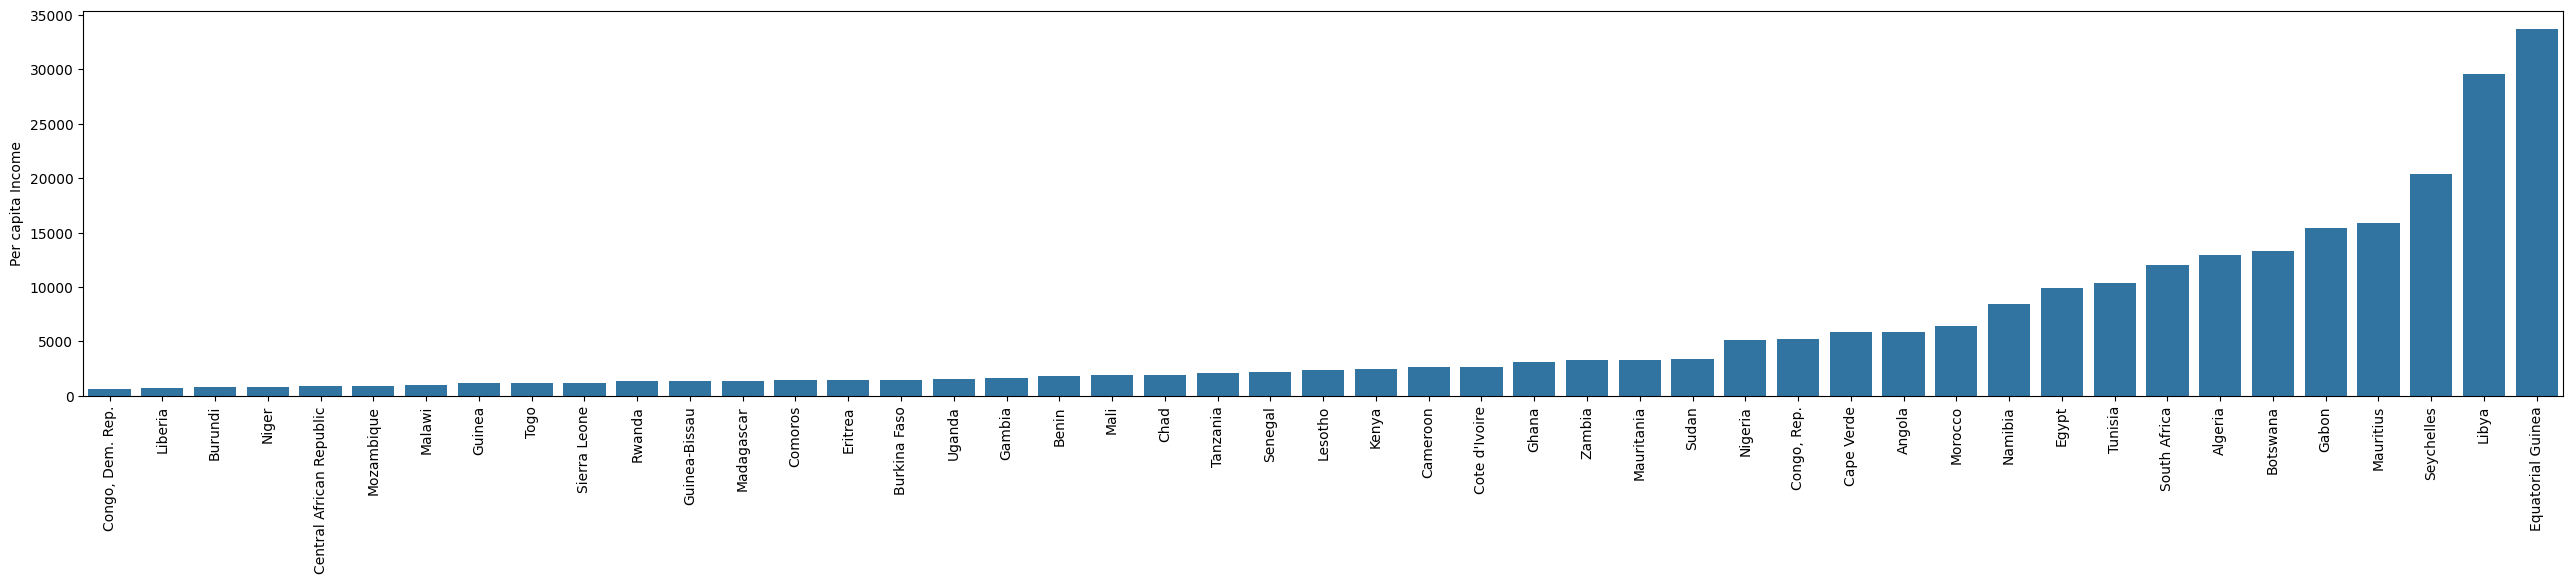

In [ ]:
# Per capita Income : Net income per person
plt.figure(figsize = (32,5))
income = new_df[['country','income']].sort_values('income', ascending = True)
ax = sns.barplot(x='country', y='income', data=income)
ax.set(xlabel = '', ylabel= 'Per capita Income')
plt.xticks(rotation=90)
plt.show()

We are able to see how Per capita Income is distributed across the all countries. Focus on the objective of the task.

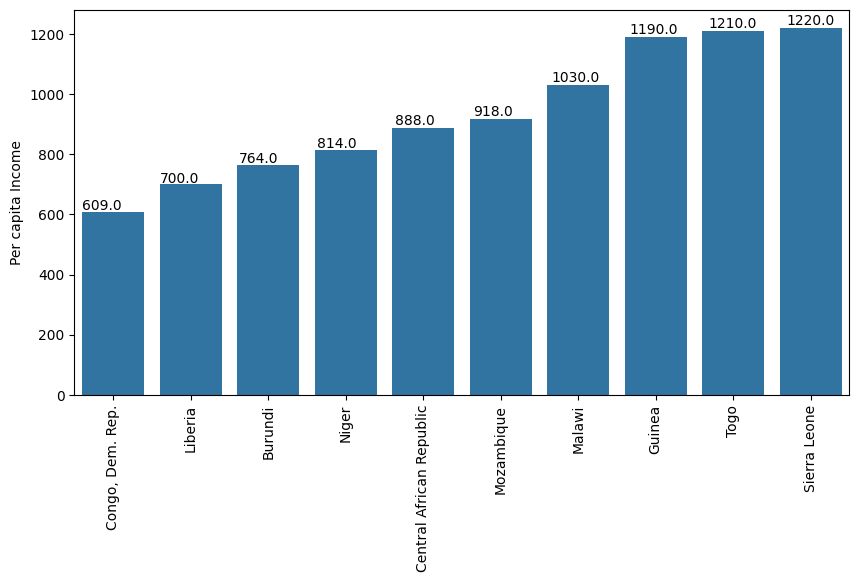

In [ ]:
plt.figure(figsize = (10,5))
income_bottom10 = new_df[['country','income']].sort_values('income', ascending = True).head(10)
ax = sns.barplot(x='country', y='income', data= income_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Per capita Income')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having lowest Per capita Income are from East Africa

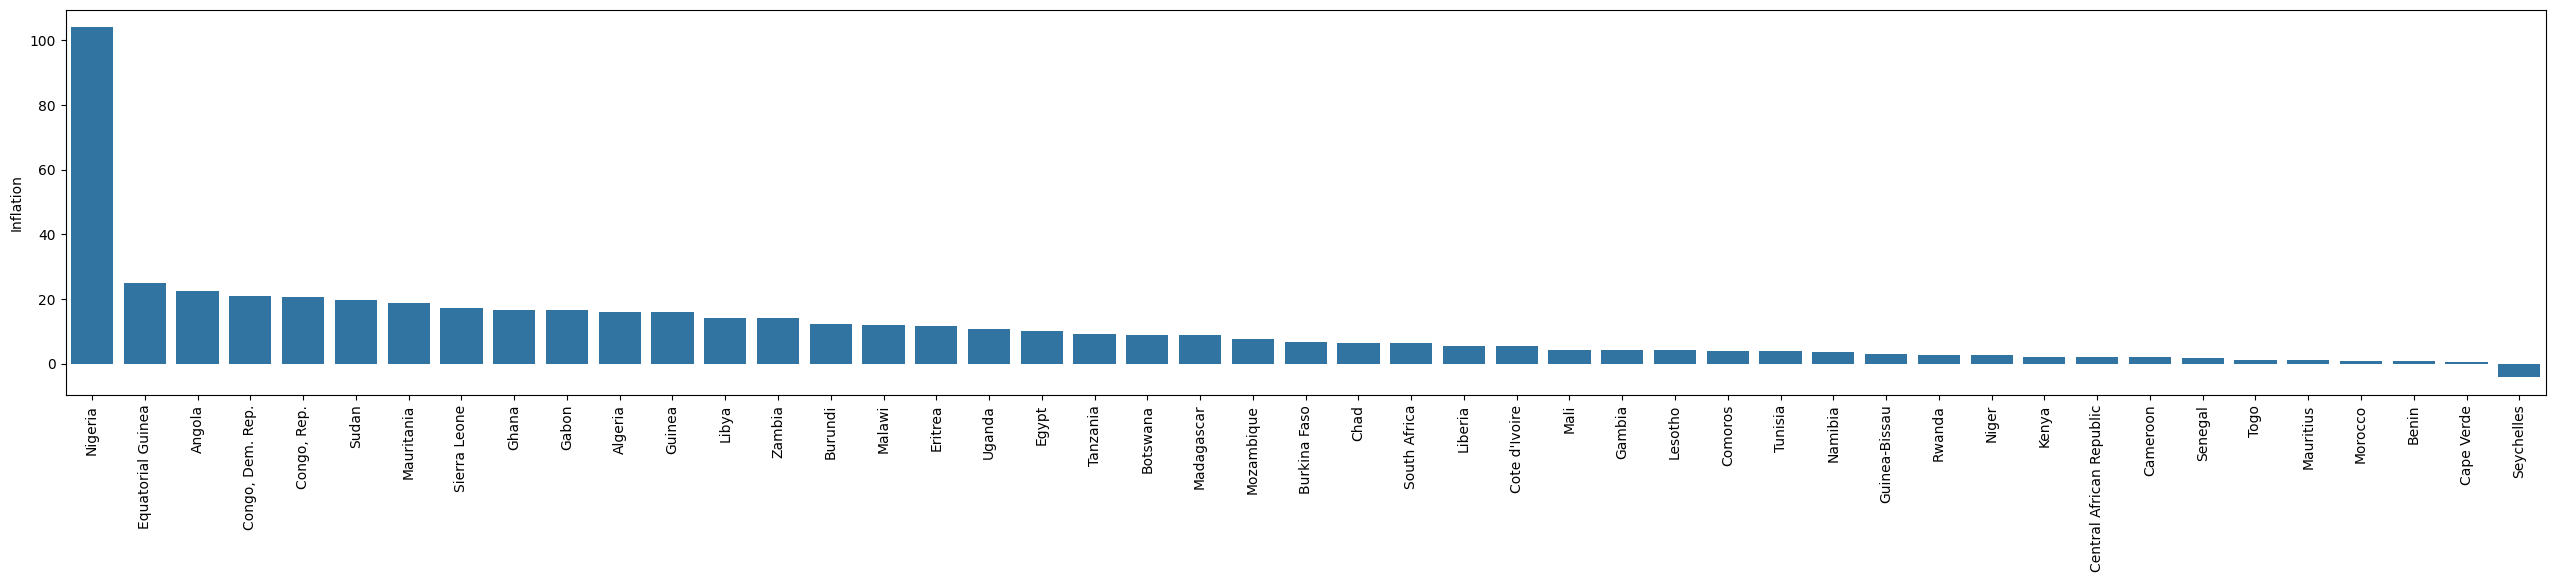

In [ ]:
# Inflation: The measurement of the annual growth rate of the Total GDP
plt.figure(figsize = (32,5))
inflation = new_df[['country','inflation']].sort_values('inflation', ascending = False)
ax = sns.barplot(x='country', y='inflation', data = inflation)
ax.set(xlabel = '', ylabel= 'Inflation')
plt.xticks(rotation=90)
plt.show()

We are able to see how Inflation is distributed across the all countries. Focus on the objective of the task.

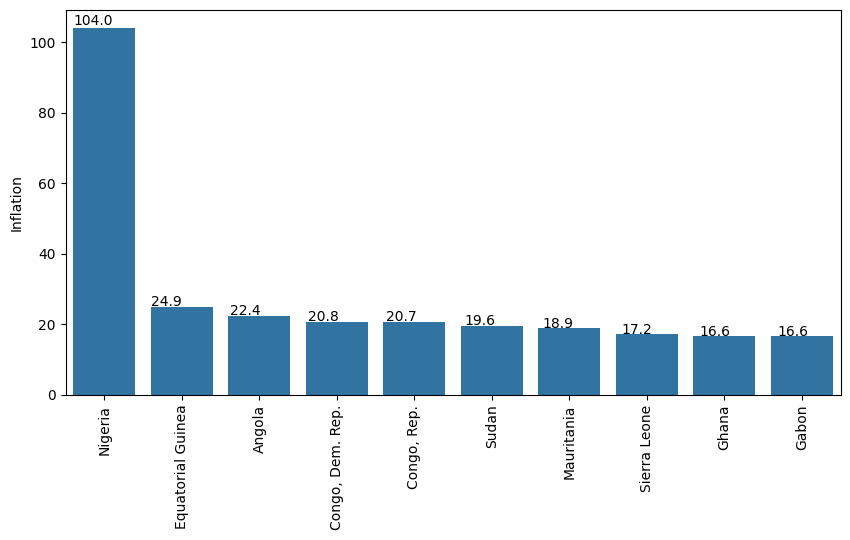

In [ ]:
plt.figure(figsize = (10,5))
inflation_top10 = new_df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
ax = sns.barplot(x='country', y='inflation', data = inflation_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Inflation')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having highest Inflation are from countries where there is social / political unrest in progress

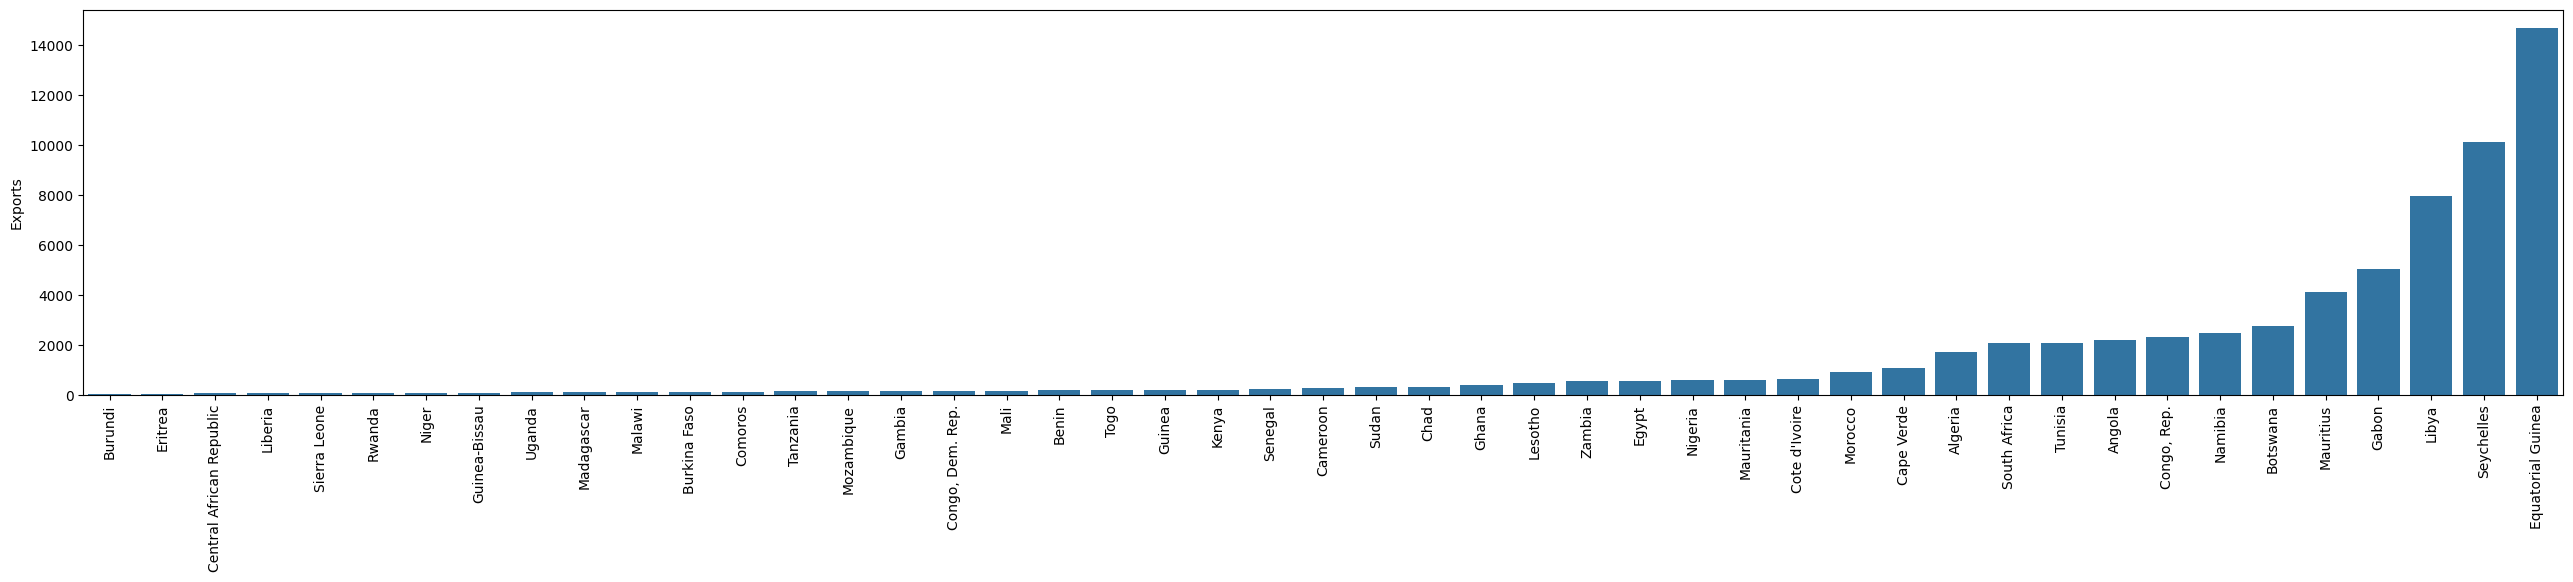

In [ ]:
# Exports: Exports of goods and services. Given as %age of the Total GDP
plt.figure(figsize = (32,5))
exports = new_df[['country','exports']].sort_values('exports', ascending = True)
ax = sns.barplot(x='country', y='exports', data = exports)
ax.set(xlabel = '', ylabel= 'Exports')
plt.xticks(rotation=90)
plt.show()

We are able to see how Exports is distributed across the all countries. Focus on the objective of the task.

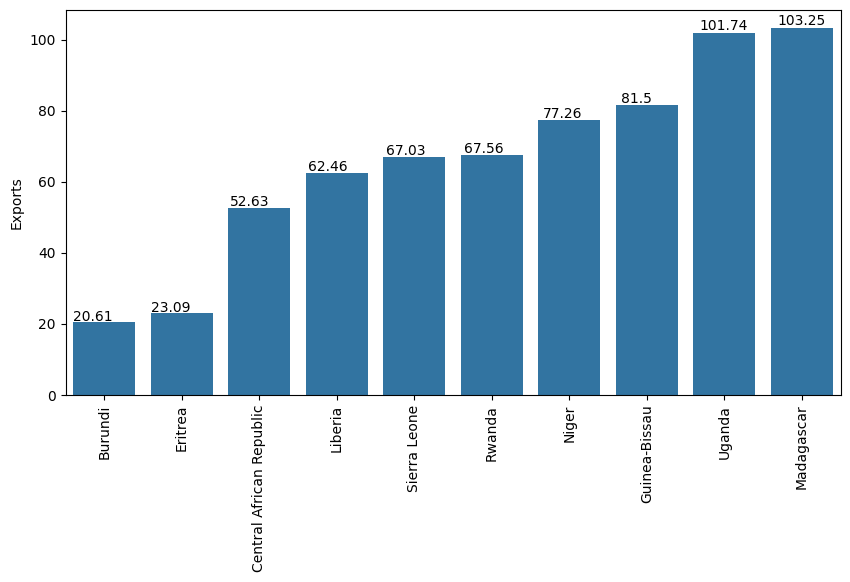

In [ ]:
plt.figure(figsize = (10,5))
exports_bottom10 = new_df[['country','exports']].sort_values('exports', ascending = True).head(10)
ax = sns.barplot(x='country', y='exports', data = exports_bottom10)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Exports')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having lowest Exports are from mostly from underdeveloped / developing countries 

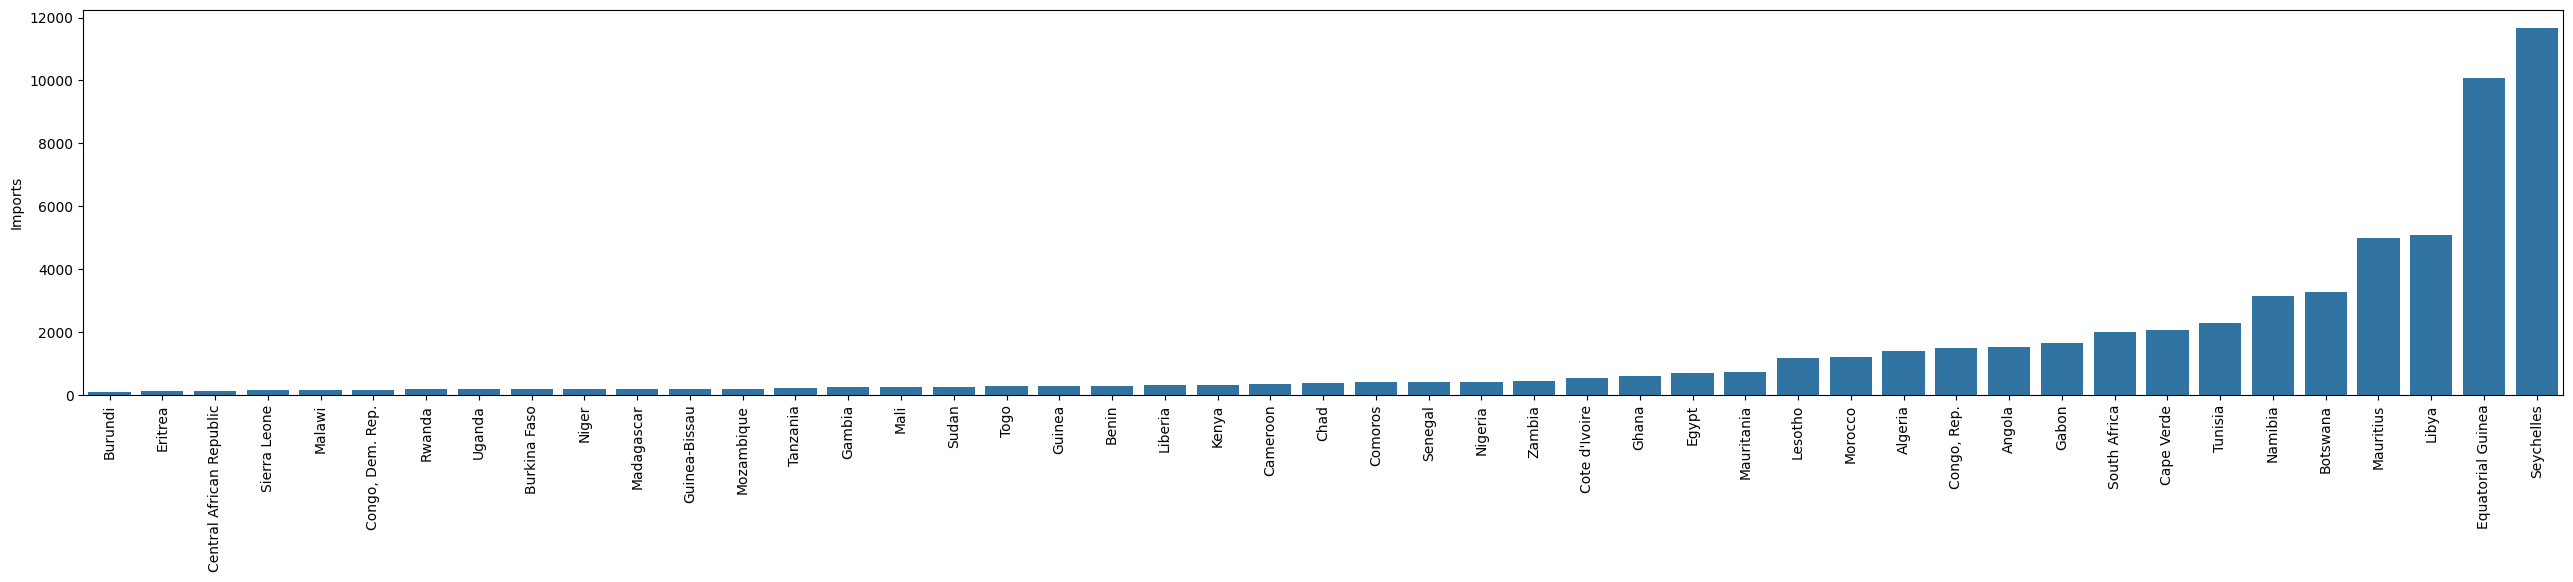

In [ ]:
# Imports: Imports of goods and services. Given as %age of the Total GDP
plt.figure(figsize = (32,5))
imports = new_df[['country','imports']].sort_values('imports', ascending = True)
ax = sns.barplot(x='country', y='imports', data = imports)
ax.set(xlabel = '', ylabel= 'Imports')
plt.xticks(rotation=90)
plt.show()

We are able to see how Imports is distributed across the all countries. Focus on the objective of the task.

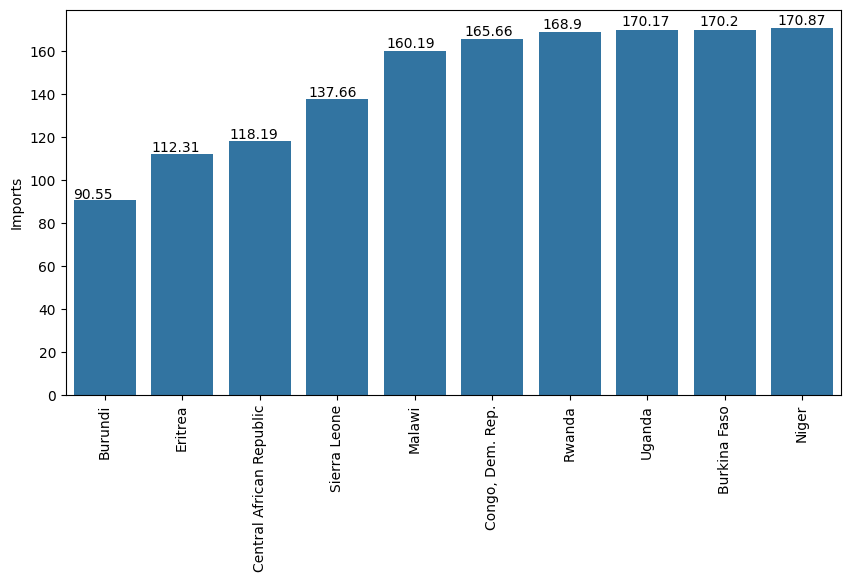

In [ ]:
plt.figure(figsize = (10,5))
imports_bottom10 = new_df[['country','imports']].sort_values('imports', ascending = True).head(10)
ax = sns.barplot(x='country', y='imports', data = imports_bottom10)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Imports')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having lowest Imports are from mostly from Developed nations who are **Atma-Nirbhar** aka Self-Reliant, who manufacture locally to support own market or the underdeveloped / developing countries who are poor to afford imports due to political / economical turmoil

####  We will have a look on the lowest 5 countries for each factor. 

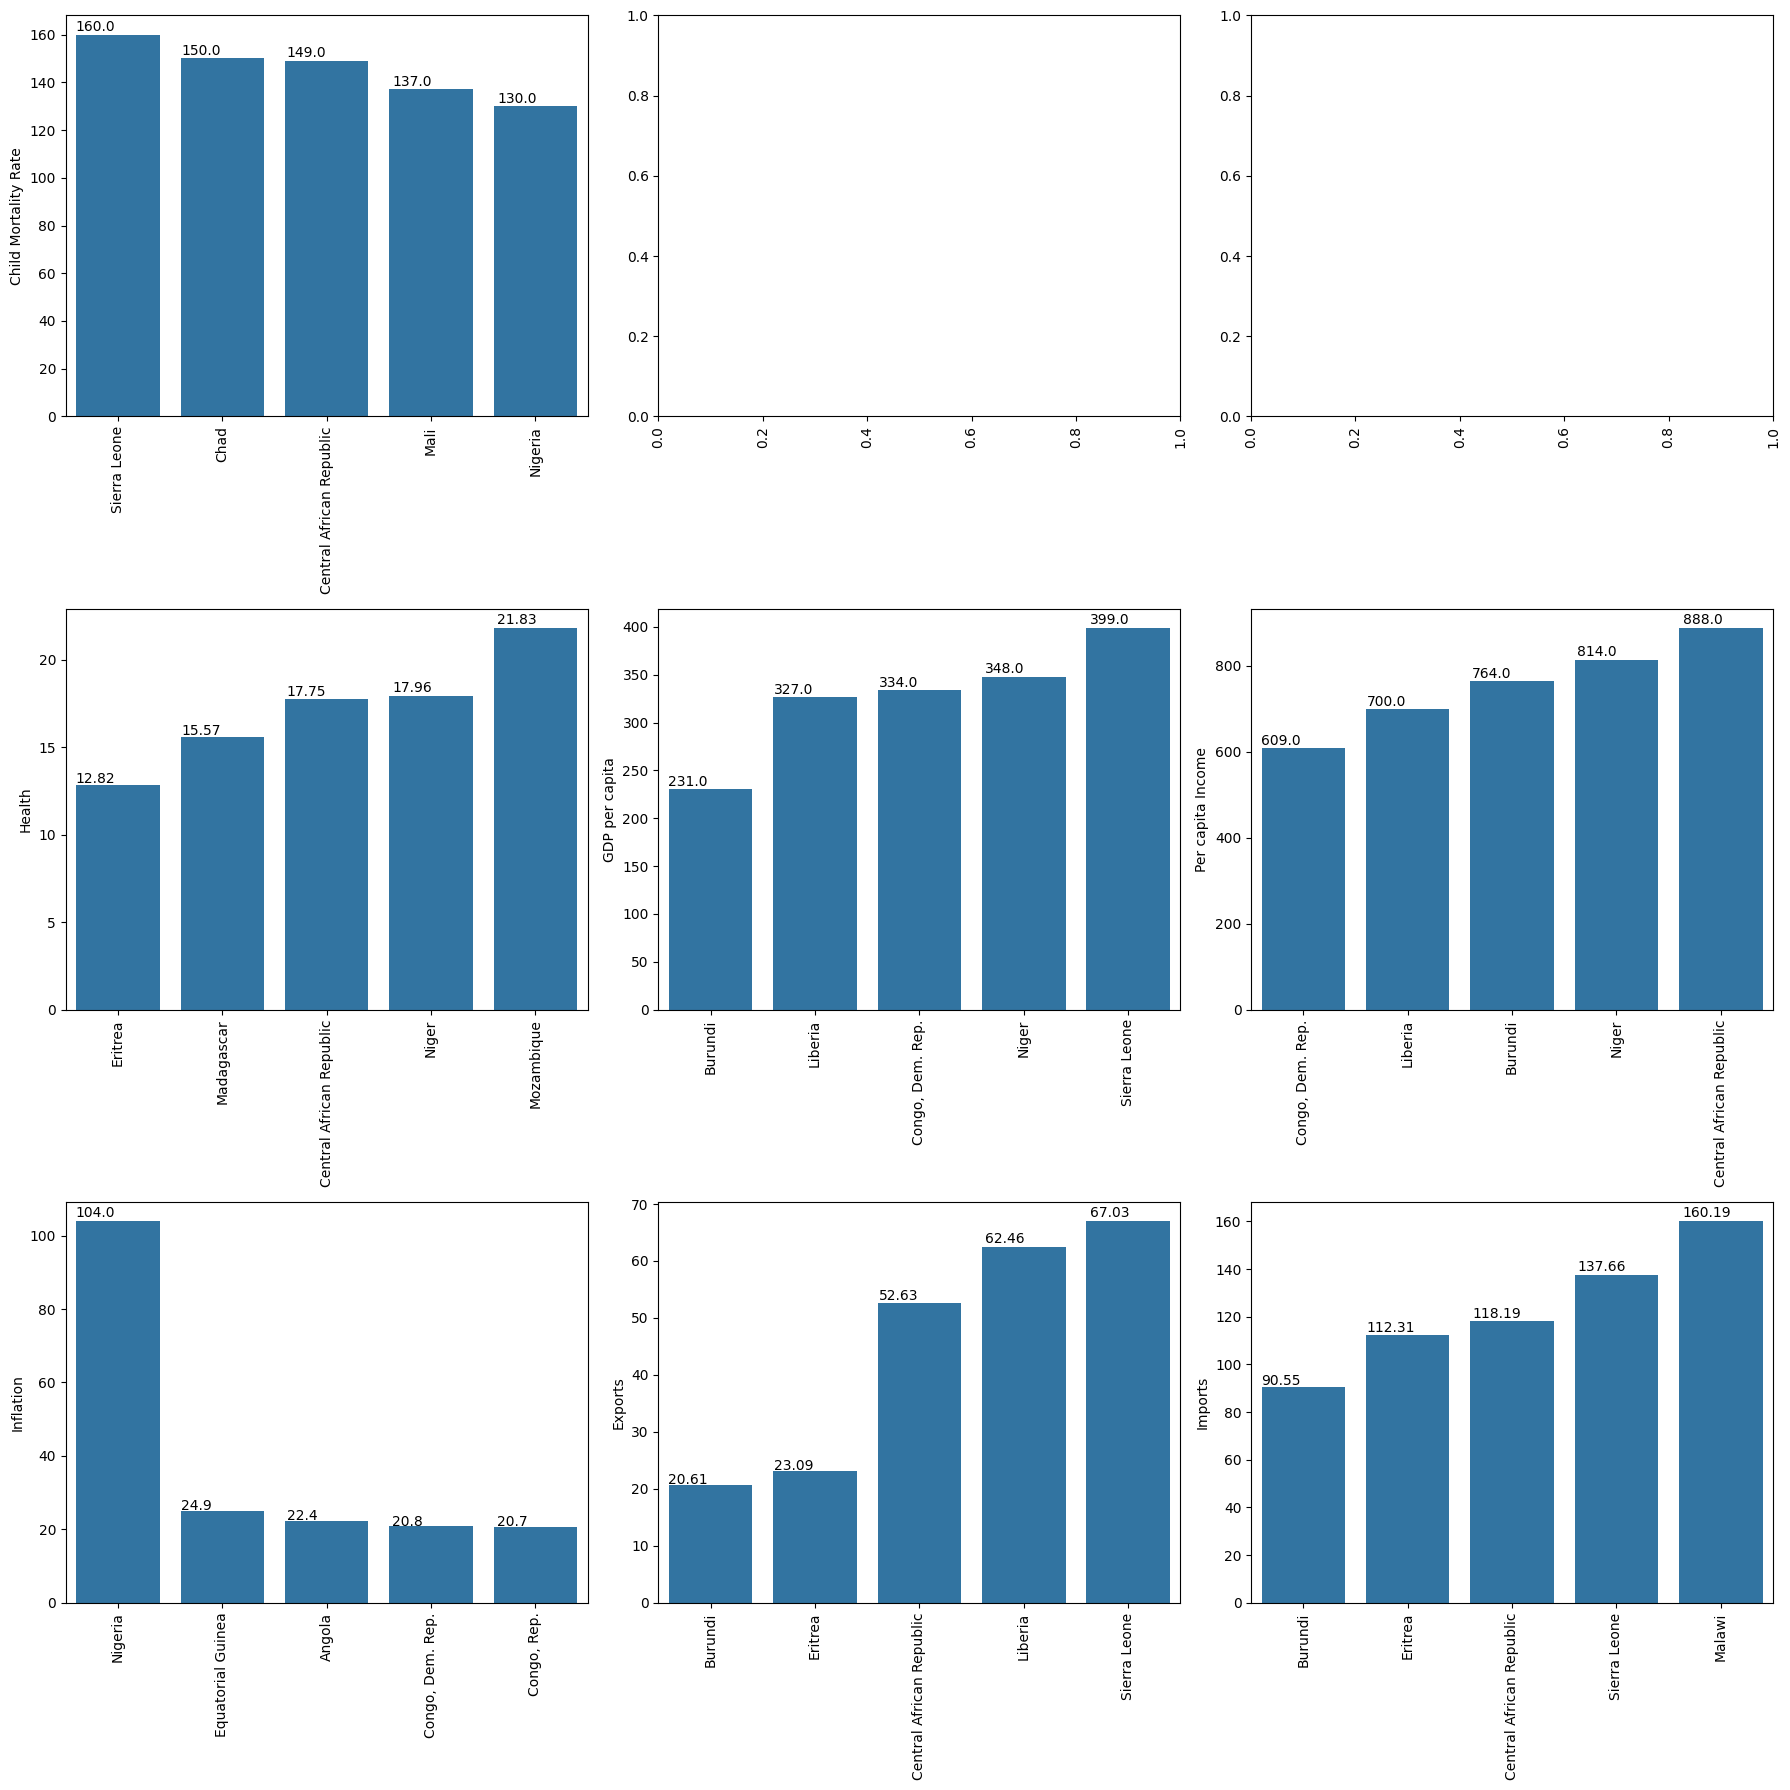

In [ ]:
fig, axs = plt.subplots(3,3,figsize = (18,18))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top5_child_mort = new_df[['country','child_mort']].sort_values('child_mort', ascending = False).head()
ax = sns.barplot(x='country', y='child_mort', data= top5_child_mort, ax = axs[0,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')


# Health :Total health spending as %age of Total GDP.

bottom5_health = new_df[['country','health']].sort_values('health', ascending = True).head()
ax = sns.barplot(x='country', y='health', data = bottom5_health, ax = axs[1,0])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom5_gdpp = new_df[['country','gdpp']].sort_values('gdpp', ascending = True).head()
ax = sns.barplot(x='country', y='gdpp', data = bottom5_gdpp, ax = axs[1,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

bottom5_income = new_df[['country','income']].sort_values('income', ascending = True).head()
ax = sns.barplot(x='country', y='income', data = bottom5_income, ax = axs[1,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP

top5_inflation = new_df[['country','inflation']].sort_values('inflation', ascending = False).head()
ax = sns.barplot(x='country', y='inflation', data = top5_inflation, ax = axs[2,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Inflation')


# Exports: Exports of goods and services. Given as %age of the Total GDP

bottom5_exports = new_df[['country','exports']].sort_values('exports', ascending = True).head()
ax = sns.barplot(x='country', y='exports', data = bottom5_exports, ax = axs[2,1])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Exports')


# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom5_imports = new_df[['country','imports']].sort_values('imports', ascending = True).head()
ax = sns.barplot(x='country', y='imports', data = bottom5_imports, ax = axs[2,2])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)    
plt.tight_layout()
plt.savefig('EDA')
plt.show()

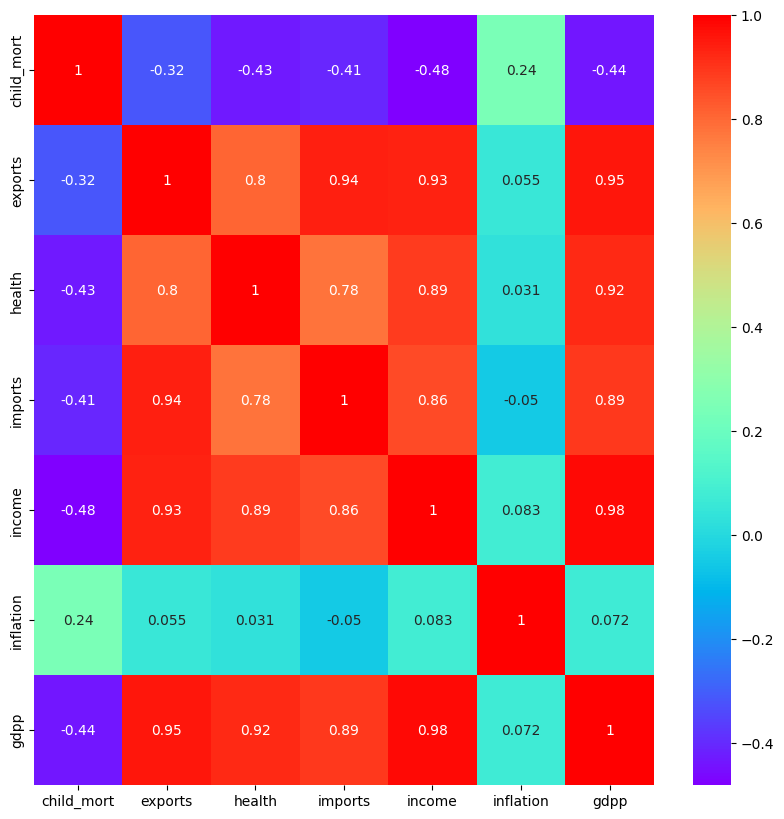

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated
numeric_new_df = new_df.drop(columns=['country', 'continent'], axis=1)

plt.figure(figsize = (10, 10))
sns.heatmap(numeric_new_df .corr(), annot = True, cmap="rainbow")
plt.savefig('Correlation')
plt.show()

- child_mortality and life_expentency are highly correlated with correlation of -0.89
- child_mortality and total_fertility are highly correlated with correlation of 0.85
- imports and exports are highly correlated with correlation of 0.99
- life_expentency and total_fertility are highly correlated with correlation of -0.76

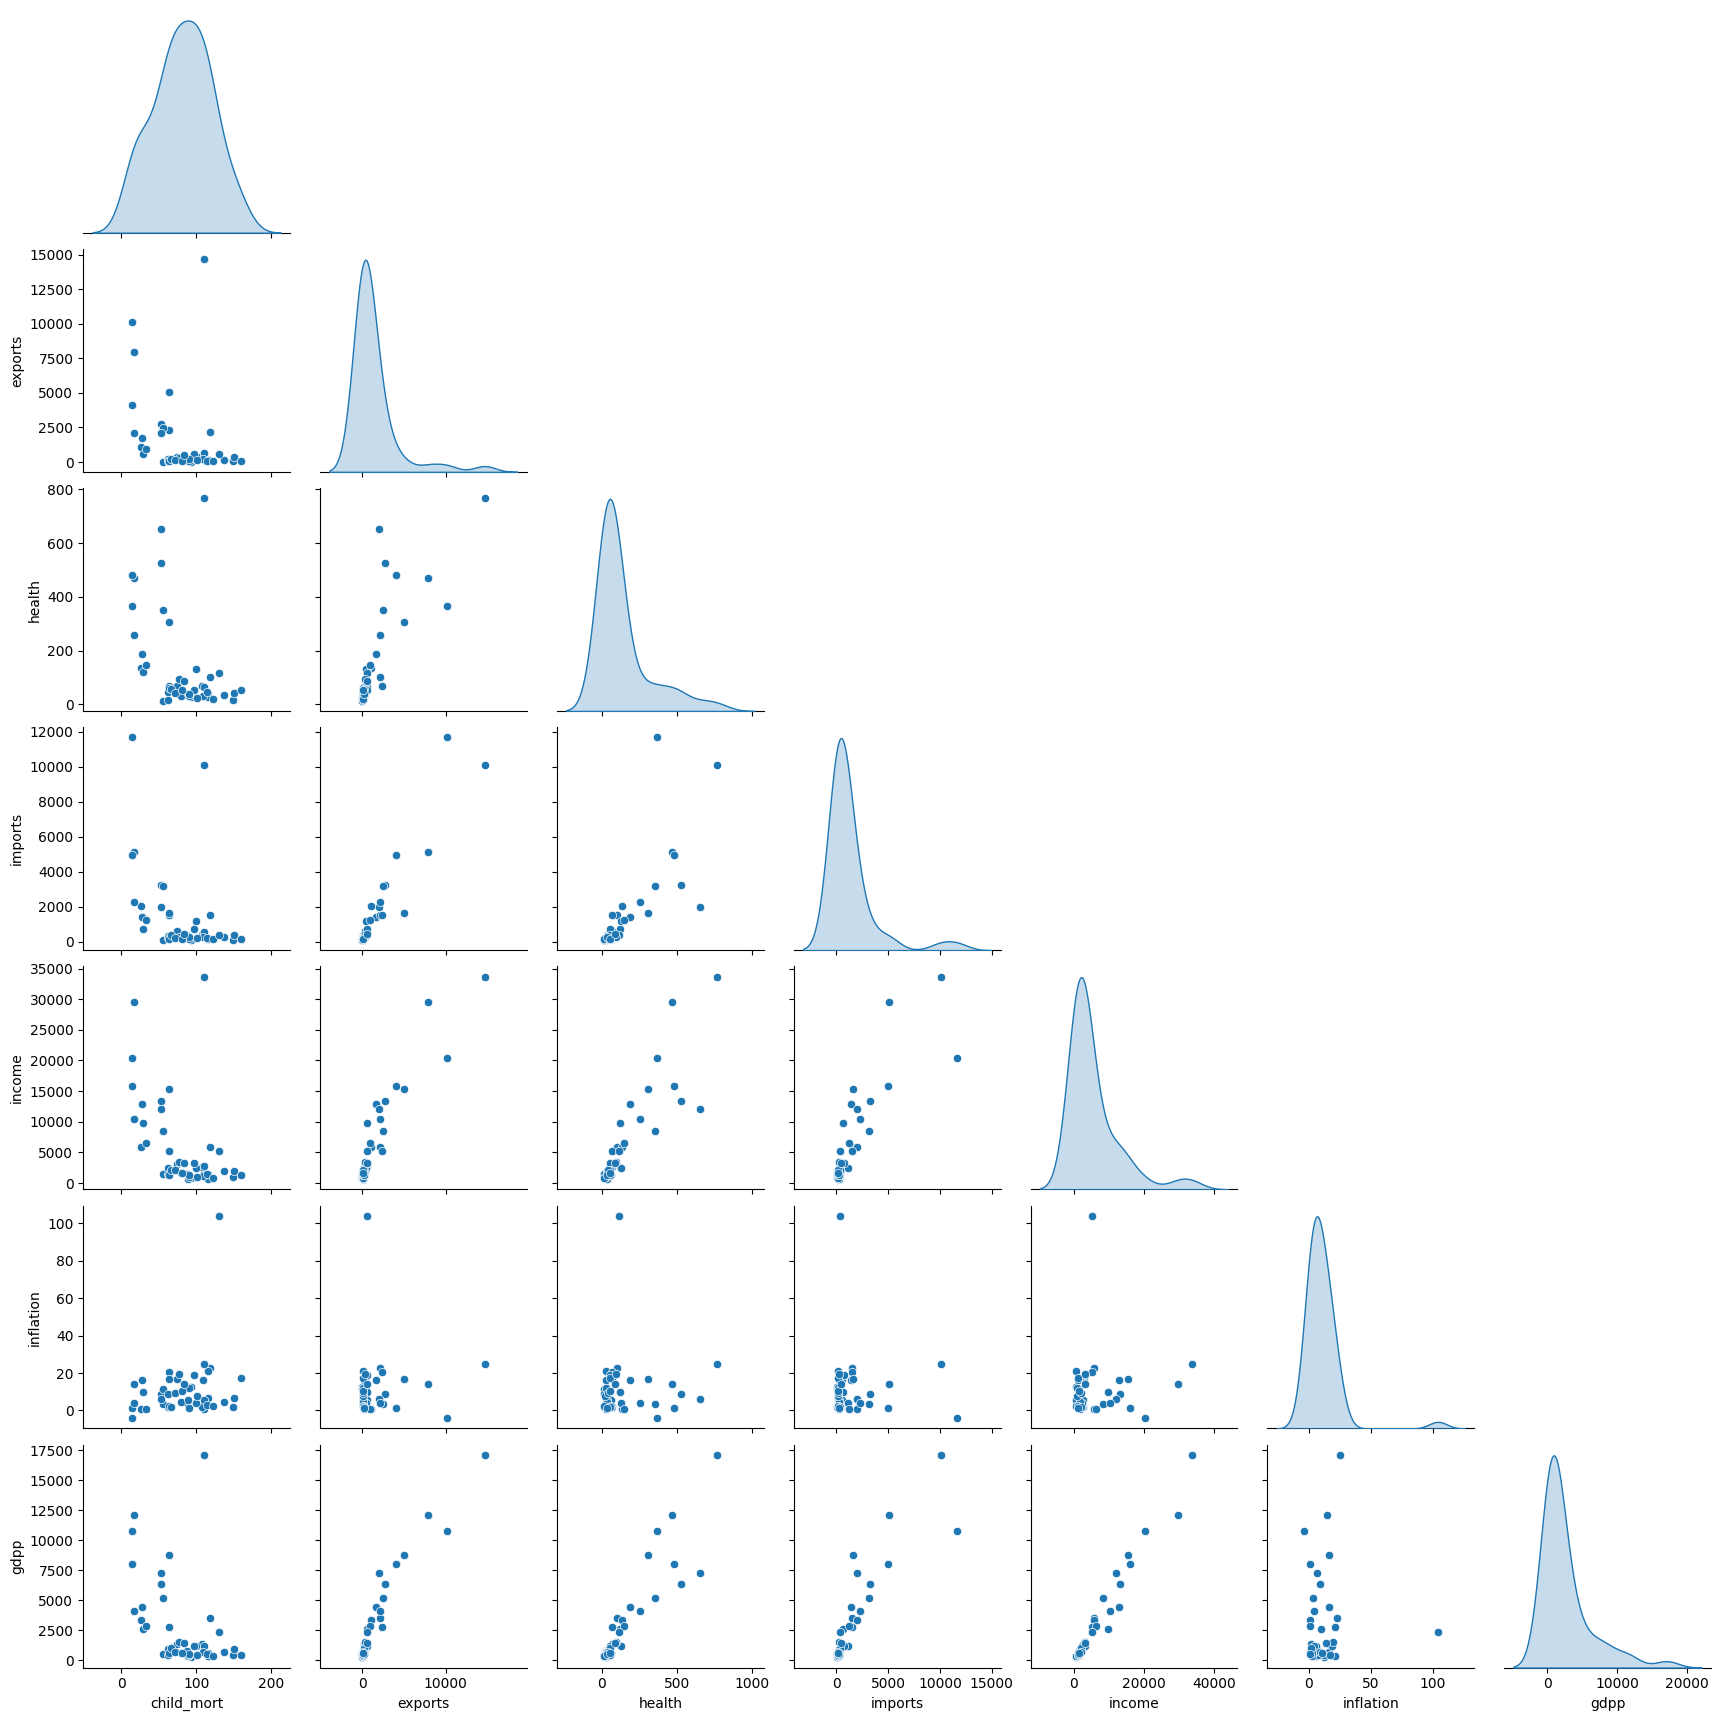

In [ ]:
sns.pairplot(new_df,corner=True,diag_kind="kde")
plt.show()

## Outlier Analysis

Visualization each columns using violinplot

5 reasons why we used a violin graph over boxplot
- Violin graph is like box plot, but better
- Violin graph is like density plot, but much useful
- Violin graph is visually intuitive and attractive
- Violin graph is non-parametric
- There are many ways to use violin graphs

In [ ]:
# new_df before Outlier Treatment 
new_df.describe()

,child_mort,exports,health,imports,income,inflation,gdpp
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,82.155319,1424.041128,137.449087,1327.895745,5627.510638,10.730553,2644.617021
std,37.912908,2829.652042,178.789149,2354.426044,7330.458894,15.591548,3600.969830
min,14.400000,20.605200,12.821200,90.552000,609.000000,-4.210000,231.000000
25%,59.100000,118.642500,34.970150,193.061000,1390.000000,2.790000,554.500000
50%,83.100000,290.820000,56.600000,390.195000,2380.000000,6.810000,1000.000000
75%,111.000000,1397.505000,132.624500,1449.610000,6170.000000,15.150000,3070.000000
max,160.000000,14671.800000,766.080000,11664.000000,33700.000000,104.000000,17100.000000


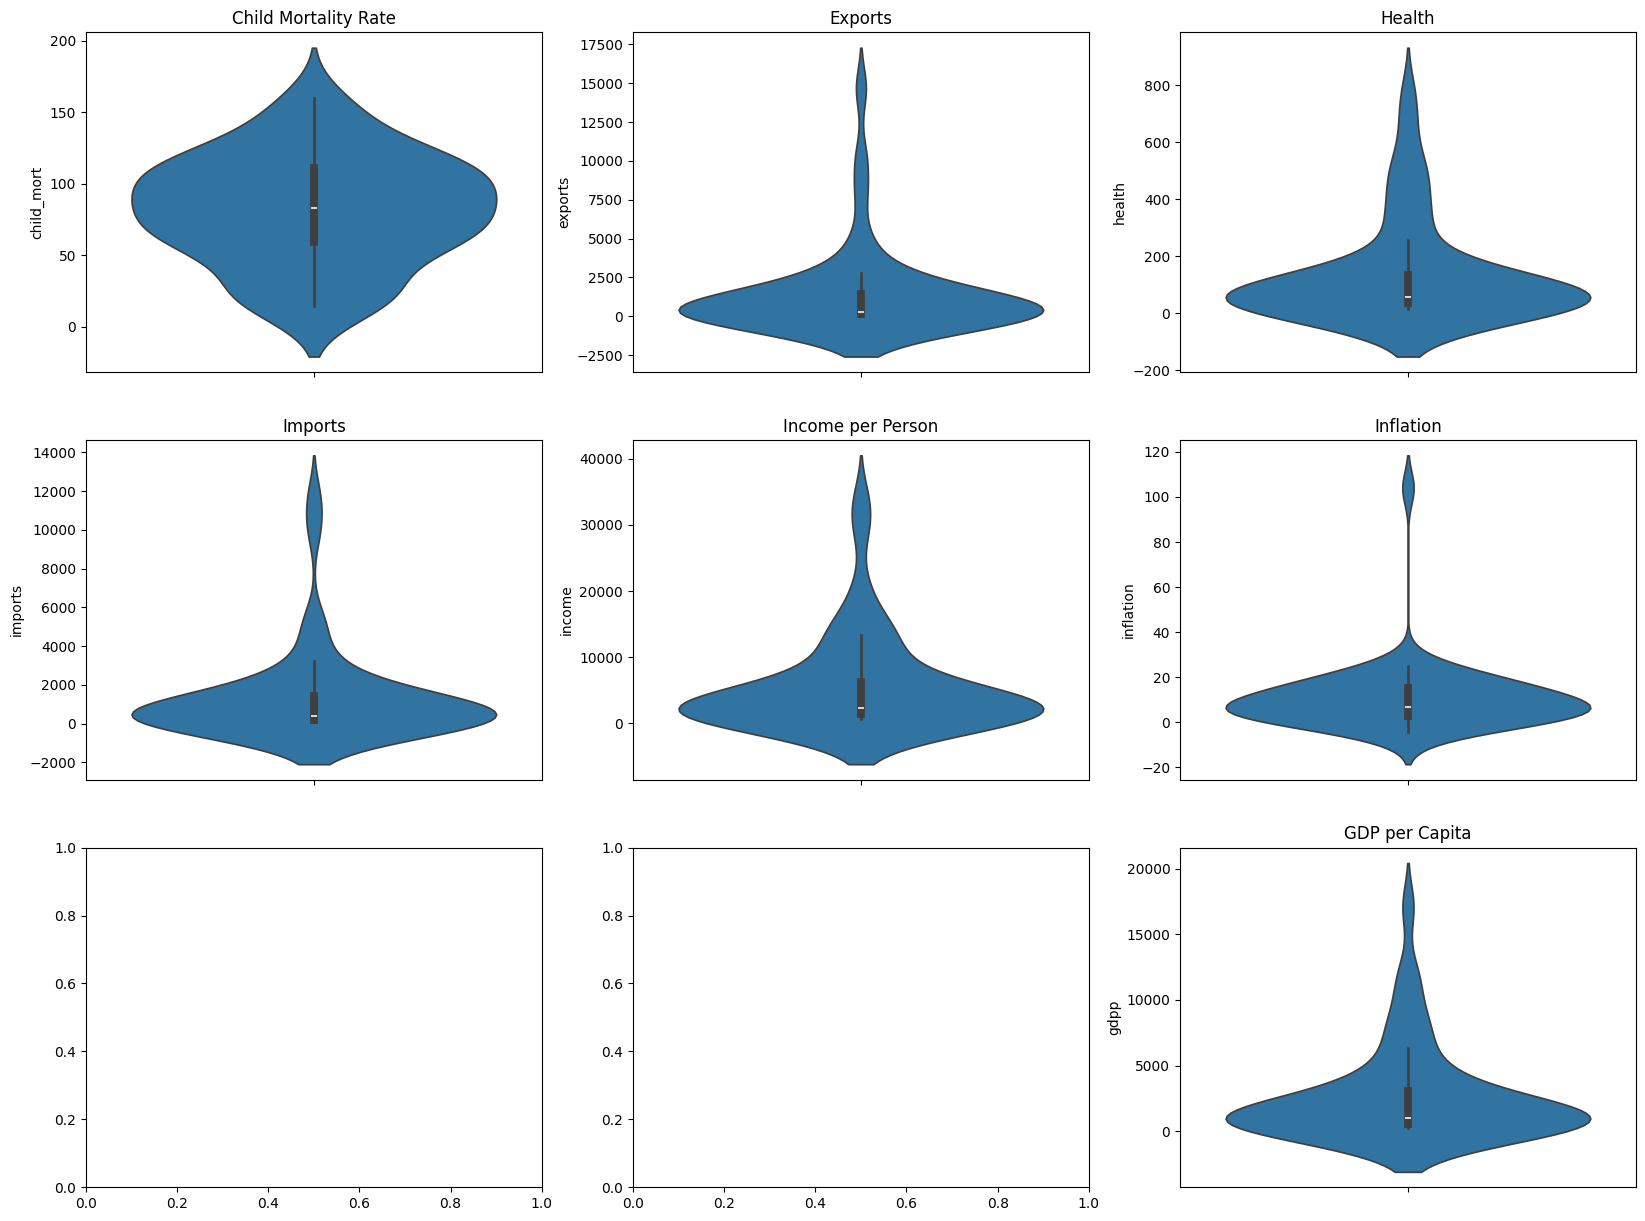

In [ ]:
f, axes = plt.subplots(3, 3, figsize=(20, 15))
s=sns.violinplot(y=new_df.child_mort,ax=axes[0, 0])
axes[0, 0].set_title('Child Mortality Rate')
s=sns.violinplot(y=new_df.exports,ax=axes[0, 1])
axes[0, 1].set_title('Exports')
s=sns.violinplot(y=new_df.health,ax=axes[0, 2])
axes[0, 2].set_title('Health')

s=sns.violinplot(y=new_df.imports,ax=axes[1, 0])
axes[1, 0].set_title('Imports')
s=sns.violinplot(y=new_df.income,ax=axes[1, 1])
axes[1, 1].set_title('Income per Person')
s=sns.violinplot(y=new_df.inflation,ax=axes[1, 2])
axes[1, 2].set_title('Inflation')

s=sns.violinplot(y=new_df.gdpp,ax=axes[2, 2])
axes[2, 2].set_title('GDP per Capita')
s.get_figure().savefig('boxplot subplots.png')
plt.show()

There is atleast one outlier in all the features
- In case of gdpp and health, there are too many outliers.
- Since we have limited number of countries(167), removing these outliers would shrink the shape of new_df and the under-developed countries which are in actual dire need may not contribute to the new_dfset.

### Plot histogram for each continous variables

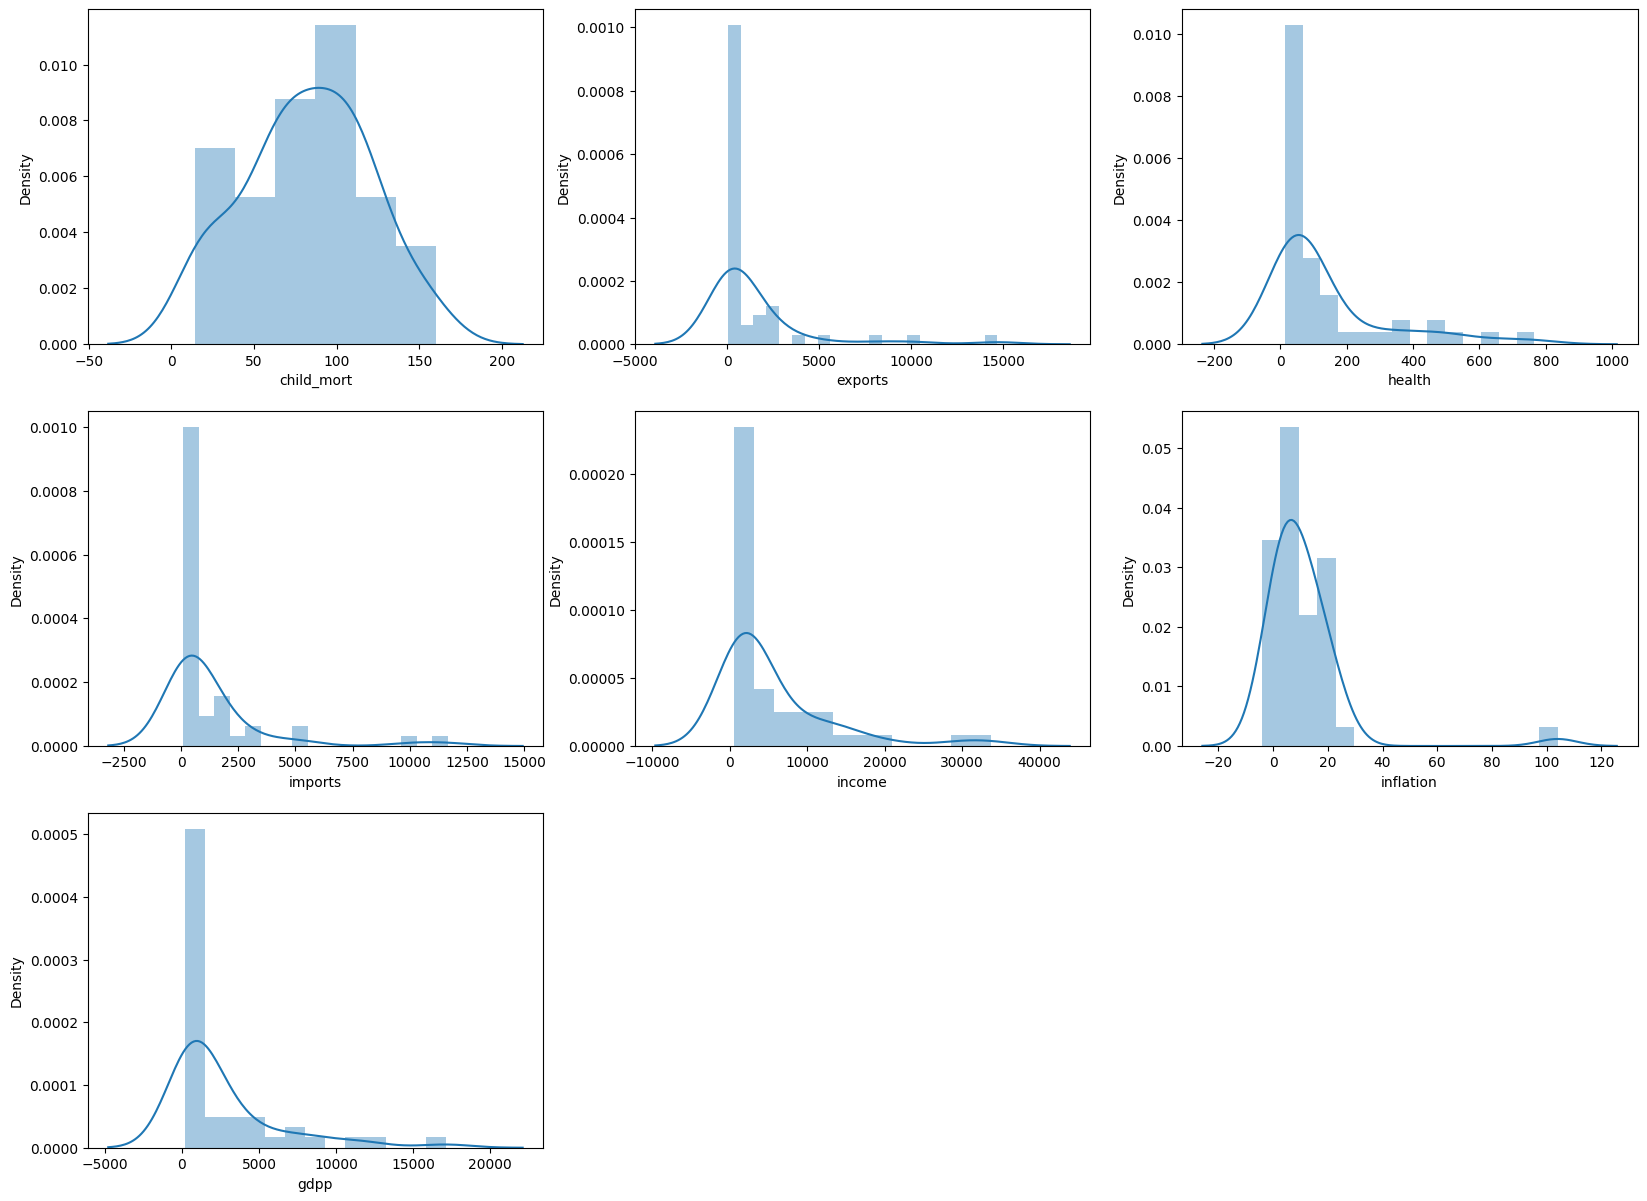

In [ ]:
plt.figure(figsize = (20,20))
features=['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'gdpp']
for i in enumerate(features):
    plt.subplot(4,3,i[0]+1)
    sns.distplot(new_df[i[1]])

**We use Percentile Capping (Winsorization) for outliers handling**
- Winsorizing or winsorization is the transformation of statistics by limiting extreme values in the statistical new_df to reduce the effect of possibly spurious outliers.
- In layman's terms, Winsorization (Winsorizing) at 1st and 99th percentile implies values that are less than the value at 1st percentile are replaced by the value at 1st percentile, and values that are greater than the value at 99th percentile are replaced by the value at 99th percentile. 


In [ ]:
Q3 = new_df.exports.quantile(0.99)
Q1 = new_df.exports.quantile(0.01)
new_df['exports'][new_df['exports']<=Q1]=Q1
new_df['exports'][new_df['exports']>=Q3]=Q3

In [ ]:
Q3 = new_df.imports.quantile(0.99)
Q1 = new_df.imports.quantile(0.01)
new_df['imports'][new_df['imports']<=Q1]=Q1
new_df['imports'][new_df['imports']>=Q3]=Q3

In [ ]:
Q3 = new_df.health.quantile(0.99)
Q1 = new_df.health.quantile(0.01)
new_df['health'][new_df['health']<=Q1]=Q1
new_df['health'][new_df['health']>=Q3]=Q3

In [ ]:
Q3 = new_df.income.quantile(0.99)
Q1 = new_df.income.quantile(0.01)
new_df['income'][new_df['income']<=Q1]=Q1
new_df['income'][new_df['income']>=Q3]=Q3

In [ ]:
Q3 = new_df.inflation.quantile(0.99)
Q1 = new_df.inflation.quantile(0.01)
new_df['inflation'][new_df['inflation']<=Q1]=Q1
new_df['inflation'][new_df['inflation']>=Q3]=Q3

In [ ]:
Q3 = new_df.total_fer.quantile(0.99)
Q1 = new_df.total_fer.quantile(0.01)
new_df['total_fer'][new_df['total_fer']<=Q1]=Q1
new_df['total_fer'][new_df['total_fer']>=Q3]=Q3

In [ ]:
Q3 = new_df.gdpp.quantile(0.99)
Q1 = new_df.gdpp.quantile(0.01)
new_df['gdpp'][new_df['gdpp']<=Q1]=Q1
new_df['gdpp'][new_df['gdpp']>=Q3]=Q3

In [ ]:
# new_df sfter Outlier Treatment 
new_df.describe()

,child_mort,exports,health,imports,income,inflation,gdpp
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,82.063319,1379.617681,136.348032,1312.526401,5588.273617,10.002530,2596.620426
std,37.702250,2626.109115,174.841736,2285.843880,7176.373796,11.066944,3410.205260
min,14.676000,21.747196,14.085694,100.558840,650.860000,-2.041100,275.160000
25%,59.100000,118.642500,34.970150,193.061000,1390.000000,2.790000,554.500000
50%,83.100000,290.820000,56.600000,390.195000,2380.000000,6.810000,1000.000000
75%,111.000000,1397.505000,132.624500,1449.610000,6170.000000,15.150000,3070.000000
max,155.400000,12582.756000,713.065920,10931.634000,31814.000000,67.614000,14800.000000


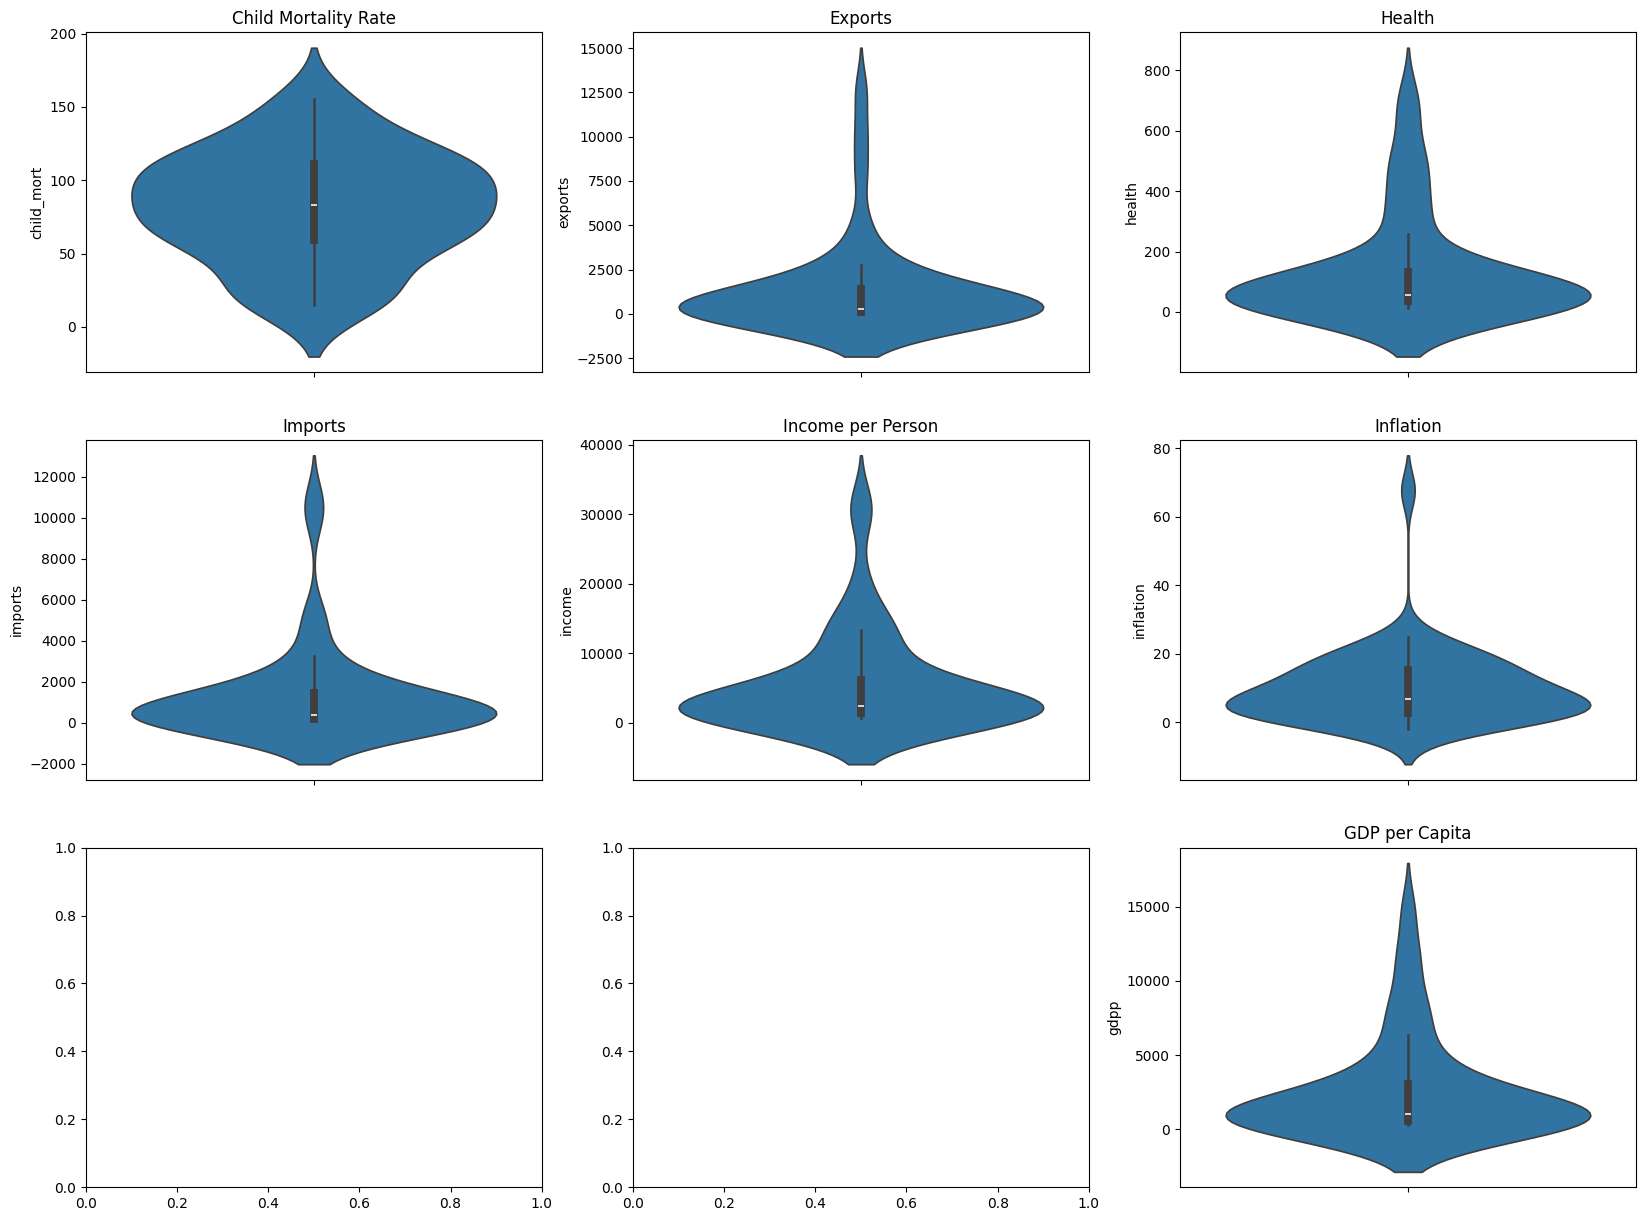

In [ ]:
f, axes = plt.subplots(3, 3, figsize=(20, 15))
s=sns.violinplot(y=new_df.child_mort,ax=axes[0, 0])
axes[0, 0].set_title('Child Mortality Rate')
s=sns.violinplot(y=new_df.exports,ax=axes[0, 1])
axes[0, 1].set_title('Exports')
s=sns.violinplot(y=new_df.health,ax=axes[0, 2])
axes[0, 2].set_title('Health')

s=sns.violinplot(y=new_df.imports,ax=axes[1, 0])
axes[1, 0].set_title('Imports')
s=sns.violinplot(y=new_df.income,ax=axes[1, 1])
axes[1, 1].set_title('Income per Person')
s=sns.violinplot(y=new_df.inflation,ax=axes[1, 2])
axes[1, 2].set_title('Inflation')


s=sns.violinplot(y=new_df.gdpp,ax=axes[2, 2])
axes[2, 2].set_title('GDP per Capita')
s.get_figure().savefig('boxplot subplots.png')
plt.show()

In [ ]:
# Dropping Country field as final new_dfframe will only contain new_df columns
new_df = new_df.drop(columns=['country', 'continent'], axis=1)
new_df = new_df.dropna()


In [ ]:
new_df.head()

,child_mort,exports,health,imports,income,inflation,gdpp
2,27.3,1712.640,185.982,1400.440,12900,16.100,4460
3,119.0,2199.190,100.605,1514.370,5900,22.400,3530
17,111.0,180.404,31.078,281.976,1820,0.885,758
21,52.5,2768.600,527.050,3257.550,13300,8.920,6350
25,116.0,110.400,38.755,170.200,1430,6.810,575


## Hopkins Statistics Test

The Hopkins statistic (introduced by Brian Hopkins and John Gordon Skellam) is a way of measuring the cluster tendency of a new_df set.It acts as a statistical hypothesis test where the null hypothesis is that the new_df is generated by a Poisson point process and are thus uniformly randomly distributed. A value close to 1 tends to indicate the new_df is highly clustered, random new_df will tend to result in values around 0.5, and uniformly distributed new_df will tend to result in values close to 0.

•	If the value is between {0.01, ...,0.3}, the new_df is regularly spaced.

•	If the value is around 0.5, it is random.

•	If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [ ]:
# Calculating Hopkins score to know whether the new_df is good for clustering or not.

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS


In [ ]:
# Hopkins score
Hopkins_score=round(hopkins(new_df),2)

In [ ]:
print("{} is a good Hopkins score for Clustering.".format(Hopkins_score))

0.94 is a good Hopkins score for Clustering.


## Rescaling the Features

Most software packages use SVD to compute the principal components and assume that the new_df is scaled and centred, so it is important to do standardisation/normalisation. There are two common ways of rescaling:

- Min-Max scaling
- Standardisation (mean-0, sigma-1)


Here, we will use Standardisation Scaling.

In [ ]:
# Standarisation technique for scaling
scaler = StandardScaler()
new_df_scaled = scaler.fit_transform(new_df)

In [ ]:
new_df_scaled

array([[-1.46251948,  0.10309358,  0.27438806,  0.03114498,  1.00281759,
         0.34810505,  0.50958753],
       [ 0.98233069,  0.27689945, -0.20830354,  0.08005784,  0.03757408,
         0.75653852,  0.24853165],
       [ 0.76903951, -0.4442533 , -0.60138481, -0.44903823, -0.52502499,
        -0.63829421, -0.5295833 ],
       [-0.79065226,  0.48030466,  2.20266688,  0.82844649,  1.05797437,
        -0.11737945,  1.04012044],
       [ 0.9023465 , -0.46926019, -0.55798175, -0.49702633, -0.57880284,
        -0.25417225, -0.58095236],
       [ 0.30513119, -0.50133678, -0.62559374, -0.53122111, -0.67063887,
         0.10174835, -0.67751496],
       [ 0.68905531, -0.40481038, -0.39714673, -0.41824541, -0.40919577,
        -0.57184273, -0.374634  ],
       [-1.4838486 , -0.1220521 , -0.01170355,  0.30811893,  0.02792165,
        -0.66292988,  0.18677649],
       [ 1.78217262, -0.48989757, -0.67673212, -0.51935546, -0.65354027,
        -0.56535966, -0.61716333],
       [ 1.80883402, -0.3907

In [ ]:
data_df1 = pd.DataFrame(new_df_scaled, columns = ['child_mort', 'exports', 'health', 'imports', 'income',
                                                'inflation', 'gdpp'])

data_df1.head()

,child_mort,exports,health,imports,income,inflation,gdpp
0,-1.462519,0.103094,0.274388,0.031145,1.002818,0.348105,0.509588
1,0.982331,0.276899,-0.208304,0.080058,0.037574,0.756539,0.248532
2,0.769040,-0.444253,-0.601385,-0.449038,-0.525025,-0.638294,-0.529583
3,-0.790652,0.480305,2.202667,0.828446,1.057974,-0.117379,1.040120
4,0.902346,-0.469260,-0.557982,-0.497026,-0.578803,-0.254172,-0.580952


# Model Building

## K- means Clustering

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

The algorithm works as follows:

First we initialize k points, called means, randomly. We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far. We repeat the process for a given number of iterations and at the end, we have our clusters.

# Finding the Optimal Number of Clusters

### Elbow Curve to get the right number of Clusters

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the new_df may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

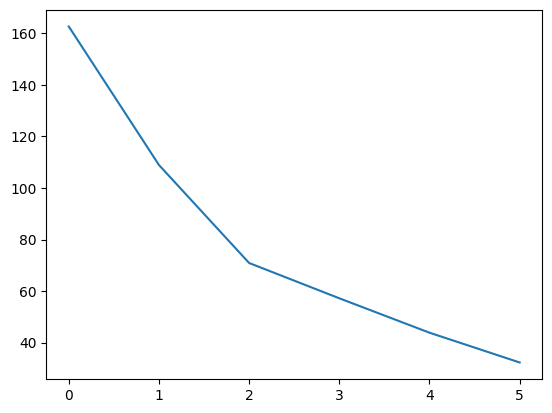

In [ ]:
# Elbow curve method to find the ideal number of clusters.
ssd = []
for num_clusters in list(range(2,8)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(data_df1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd);

Looking at the above elbow curve it looks good to proceed with 3 clusters.

## Silhouette Analysis

silhouette score=(p−q)/max(p,q)
 
**p**  is the mean distance to the points in the nearest cluster that the new_df point is not a part of

**q**  is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the new_df point is very similar to other new_df points in the cluster,

A score closer to -1 indicates that the new_df point is not similar to the new_df points in its cluster.

In [ ]:
# Silhouette score analysis to find the ideal number of clusters for K-means clustering

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(data_df1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data_df1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6141331868288777
For n_clusters=3, the silhouette score is 0.5083606988970258
For n_clusters=4, the silhouette score is 0.5335818315984534
For n_clusters=5, the silhouette score is 0.44827171989750736
For n_clusters=6, the silhouette score is 0.4481420268981205
For n_clusters=7, the silhouette score is 0.32768655168781563
For n_clusters=8, the silhouette score is 0.3190361780710067


In [ ]:
#K-means with k=3 clusters

cluster = KMeans(n_clusters=3, max_iter=150, random_state= 50)
cluster.fit(data_df1)

KMeans(max_iter=150, n_clusters=3, random_state=50)

As the IMF and the UN, world is divided into 3 major classification for countries on scale of development.
- Developed countries
- Developing countries
- Least developed countries

In [ ]:
# Cluster labels

cluster.labels_

array([2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0,
       2, 0, 0])

In [134]:
# Assign the label

new_df['Cluster_Id'] = cluster.labels_
new_df.head()

,country,child_mort,exports,health,imports,income,inflation,gdpp,continent,Cluster_Id
2,Algeria,27.3,1712.640,185.982,1400.440,12900,16.100,4460,Africa,2
3,Angola,119.0,2199.190,100.605,1514.370,5900,22.400,3530,Africa,0
17,Benin,111.0,180.404,31.078,281.976,1820,0.885,758,Africa,0
21,Botswana,52.5,2768.600,527.050,3257.550,13300,8.920,6350,Africa,2
25,Burkina Faso,116.0,110.400,38.755,170.200,1430,6.810,575,Africa,0


In [135]:
## Number of countries in each cluster
new_df.Cluster_Id.value_counts(ascending=True)

Cluster_Id
1     3
2    10
0    34
Name: count, dtype: int64

It seems there are good number of countries in each clusters.

From the business understanding we have learnt that **Child_Mortality, Income, Gdpp** are some important factors which decides the development of any country. Hence, we will proceed with analyzing these 3 components to build some meaningful clusters.

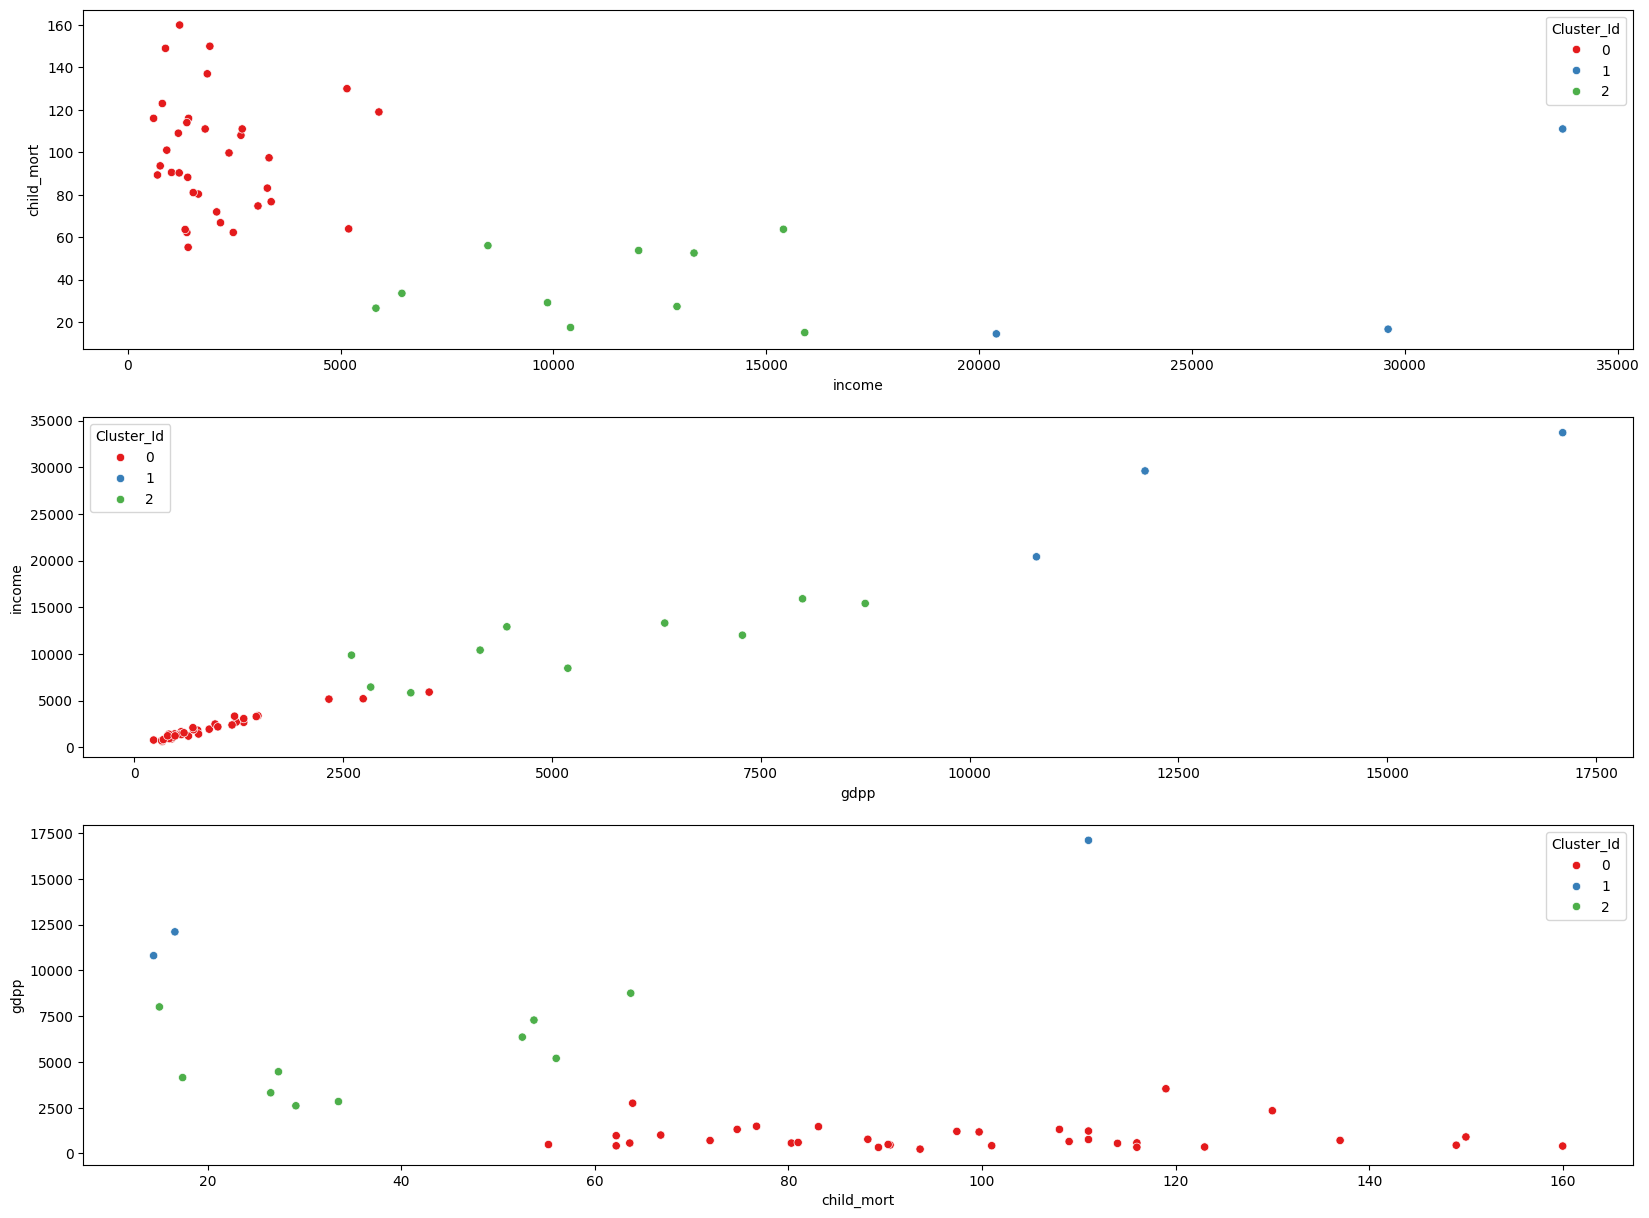

In [136]:
# Scatter plot on Original attributes to visualize the spread of the new_df

plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_Id',data = new_df,legend='full',palette="Set1")
plt.subplot(3,1,2)
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_Id', data = new_df,legend='full',palette="Set1")
plt.subplot(3,1,3)
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_Id', data =new_df,legend='full',palette="Set1")
plt.show()

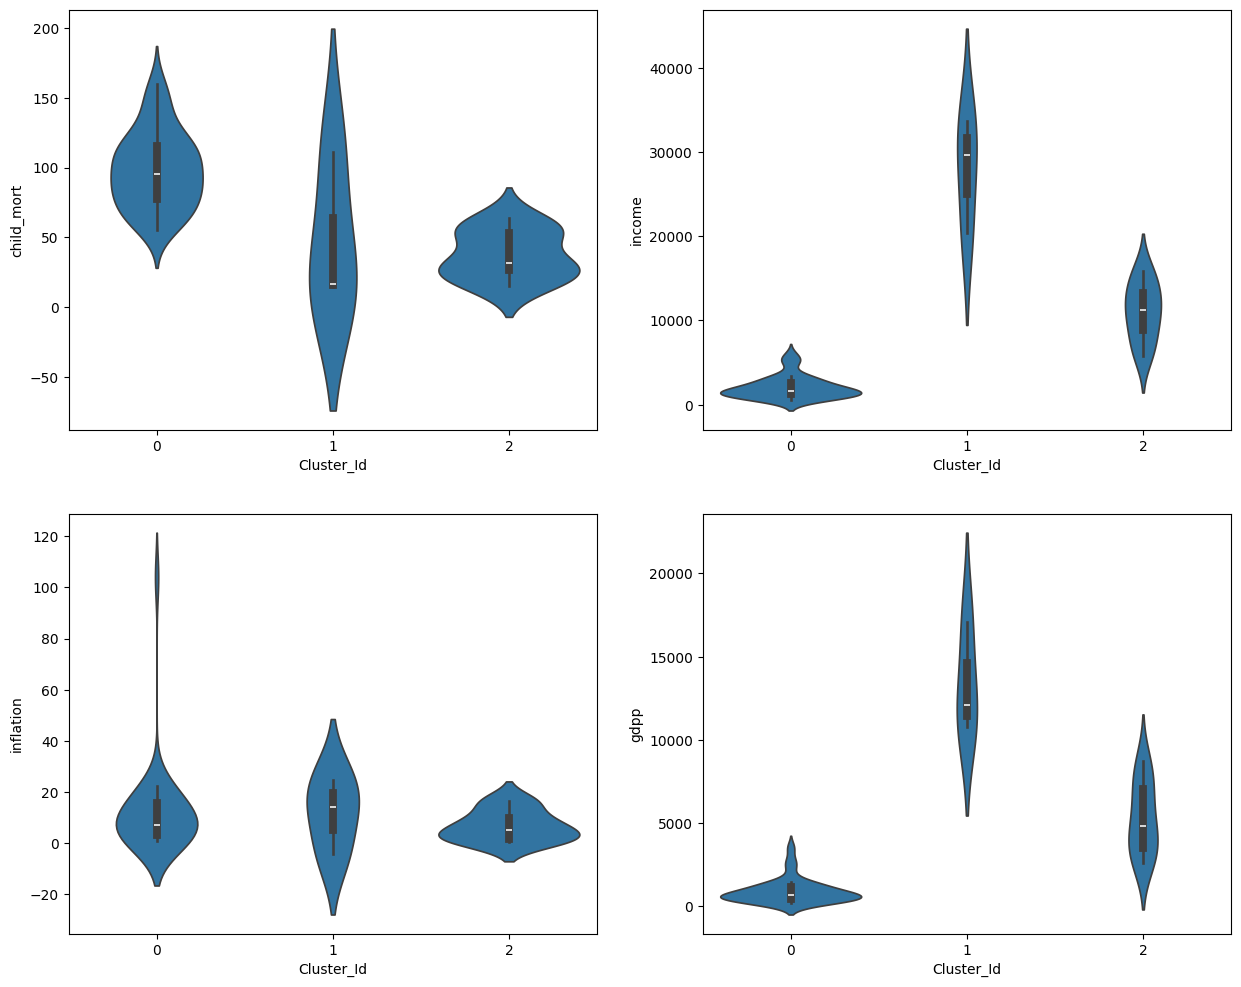

In [138]:
 #Violin plot on Original attributes to visualize the spread of the new_df

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.violinplot(x = 'Cluster_Id', y = 'child_mort', data = new_df,ax=axes[0][0])
sns.violinplot(x = 'Cluster_Id', y = 'income', data = new_df,ax=axes[0][1])
sns.violinplot(x = 'Cluster_Id', y = 'inflation', data =new_df,ax=axes[1][0])
sns.violinplot(x = 'Cluster_Id', y = 'gdpp', data =new_df,ax=axes[1][1])
plt.show()

In [ ]:
new_df[['gdpp','income','child_mort','Cluster_Id']].groupby('Cluster_Id').mean()

,gdpp,income,child_mort
Cluster_Id,,,
0,923.147059,2067.735294,98.370588
1,13333.333333,27900.000000,47.333333
2,5291.000000,11049.000000,37.470000


## Cluster Profiling

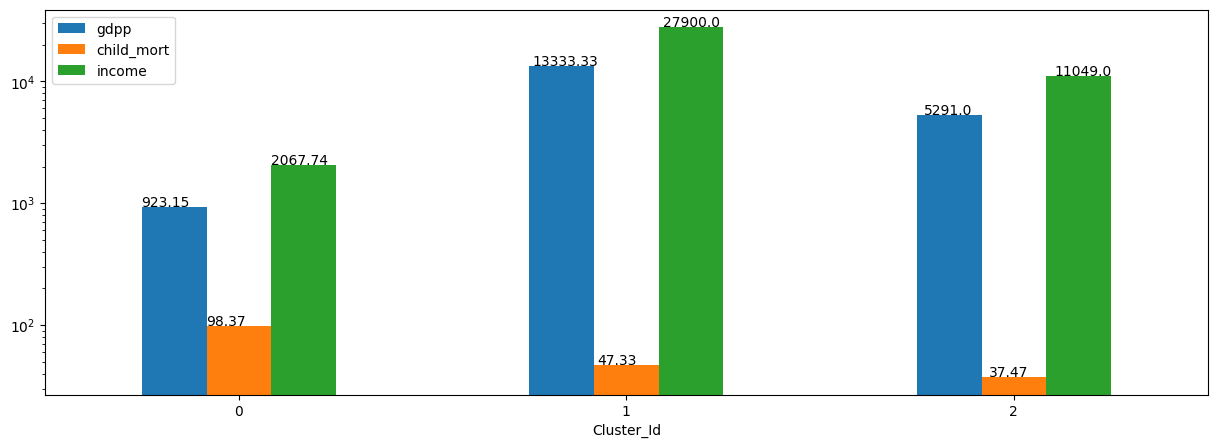

In [139]:
ax=new_df[['gdpp','child_mort','income','Cluster_Id']].groupby('Cluster_Id').mean().plot(kind = 'bar',figsize = (15,5))

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.yscale('log')
plt.xticks(rotation=0)
plt.show();

In [140]:
new_df[new_df['Cluster_Id']==1].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
# They are Developed countries as per UN & IMF

,country,child_mort,exports,health,imports,income,inflation,gdpp,continent,Cluster_Id
49,Equatorial Guinea,111.0,14671.8,766.08,10071.9,33700,24.90,17100,Africa,1
89,Libya,16.6,7937.6,469.48,5094.1,29600,14.20,12100,Africa,1
131,Seychelles,14.4,10130.4,367.20,11664.0,20400,-4.21,10800,Africa,1


In [141]:
new_df[new_df['Cluster_Id']==2].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()

# They are Least developed countries as per UN & IMF

,country,child_mort,exports,health,imports,income,inflation,gdpp,continent,Cluster_Id
55,Gabon,63.7,5048.75,306.250,1653.75,15400,16.600,8750,Africa,2
108,Namibia,56.0,2480.82,351.882,3150.33,8460,3.560,5190,Africa,2
137,South Africa,53.7,2082.08,650.832,1994.72,12000,6.350,7280,Africa,2
21,Botswana,52.5,2768.60,527.050,3257.55,13300,8.920,6350,Africa,2
105,Morocco,33.5,911.26,147.160,1216.90,6440,0.976,2830,Africa,2


In [ ]:
new_df[new_df['Cluster_Id']==0].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
# They are Developing countries as per UN & IMF



,child_mort,exports,health,imports,income,inflation,gdpp,Cluster_Id
132,160.0,67.032,52.2690,137.655,1220,17.20,399,0
32,150.0,330.096,40.6341,390.195,1930,6.39,897,0
31,149.0,52.628,17.7508,118.190,888,2.01,446,0
97,137.0,161.424,35.2584,248.508,1870,4.37,708,0
113,130.0,589.490,118.1310,405.420,5150,104.00,2330,0


# Final List of countries which are in need of the aid based on socio-economic factors.

In [142]:
FinalListbyKMean=new_df[new_df['Cluster_Id']==2].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
FinalListbyKMean['country']
FinalListbyKMean.reset_index(drop=True).country[:5]

0           Gabon
1         Namibia
2    South Africa
3        Botswana
4         Morocco
Name: country, dtype: object

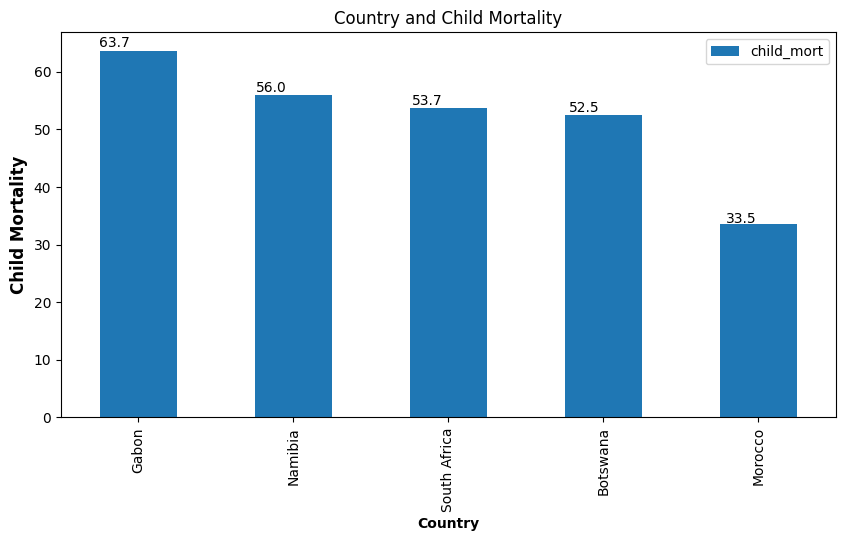

In [151]:
# BarPlot for Child Mortality of countries which are in need of aid
df_list_cm = pd.DataFrame(FinalListbyKMean.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
ax=df_list_cm.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.show()

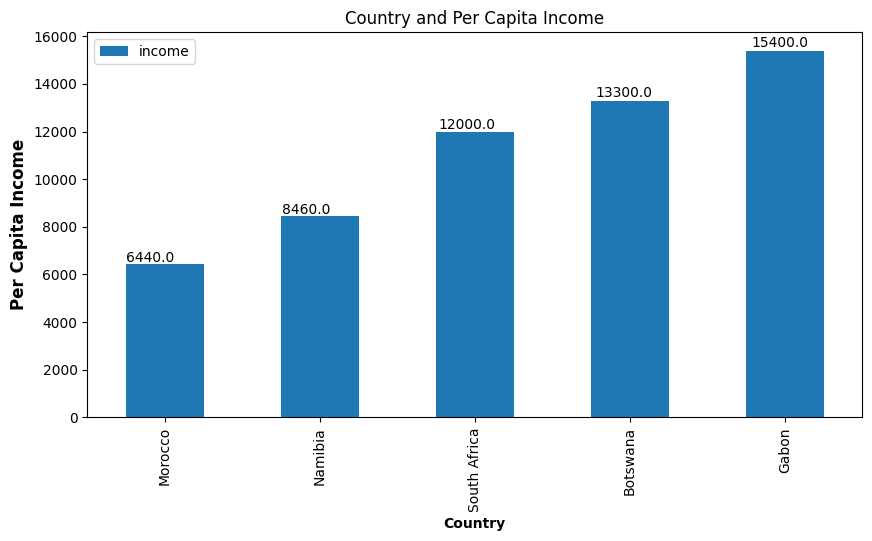

In [148]:
# BarPlot for Per Capita Income of countries which are in need of aid

df_list_in = pd.DataFrame(FinalListbyKMean.groupby(['country'])['income'].mean().sort_values(ascending = True))
ax=df_list_in.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.show()

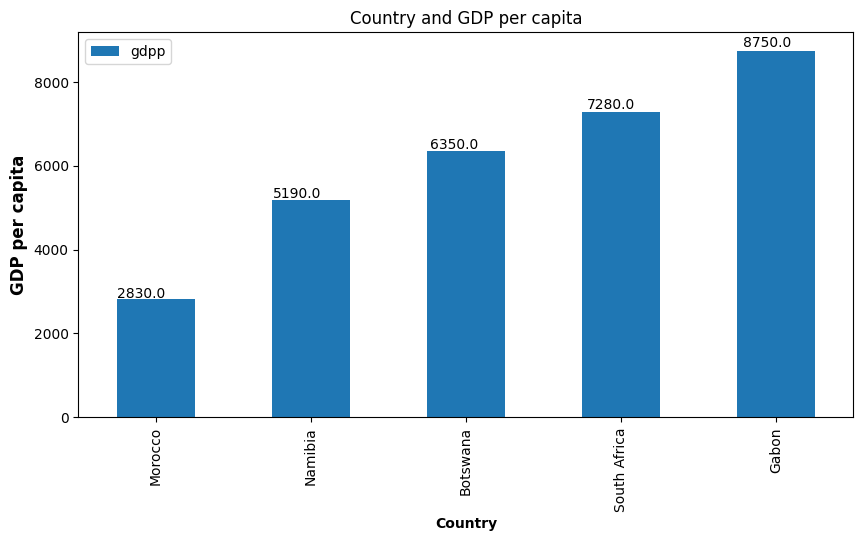

In [146]:
# BarPlot for GDP of countries which are in need of aid

df_list_gdp =pd.DataFrame(FinalListbyKMean.groupby(['country'])['gdpp'].mean().sort_values(ascending = True))
ax=df_list_gdp.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.title('Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()

Now We will apply Hierarchial Clustering to see if we get any better clusters or not.

## Hierarchical Clustering

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering,

- Divisive
- Agglomerative.

In [149]:
data_df1.head()

,child_mort,exports,health,imports,income,inflation,gdpp
0,-1.462519,0.103094,0.274388,0.031145,1.002818,0.348105,0.509588
1,0.982331,0.276899,-0.208304,0.080058,0.037574,0.756539,0.248532
2,0.769040,-0.444253,-0.601385,-0.449038,-0.525025,-0.638294,-0.529583
3,-0.790652,0.480305,2.202667,0.828446,1.057974,-0.117379,1.040120
4,0.902346,-0.469260,-0.557982,-0.497026,-0.578803,-0.254172,-0.580952


### Single Linkage:

In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.

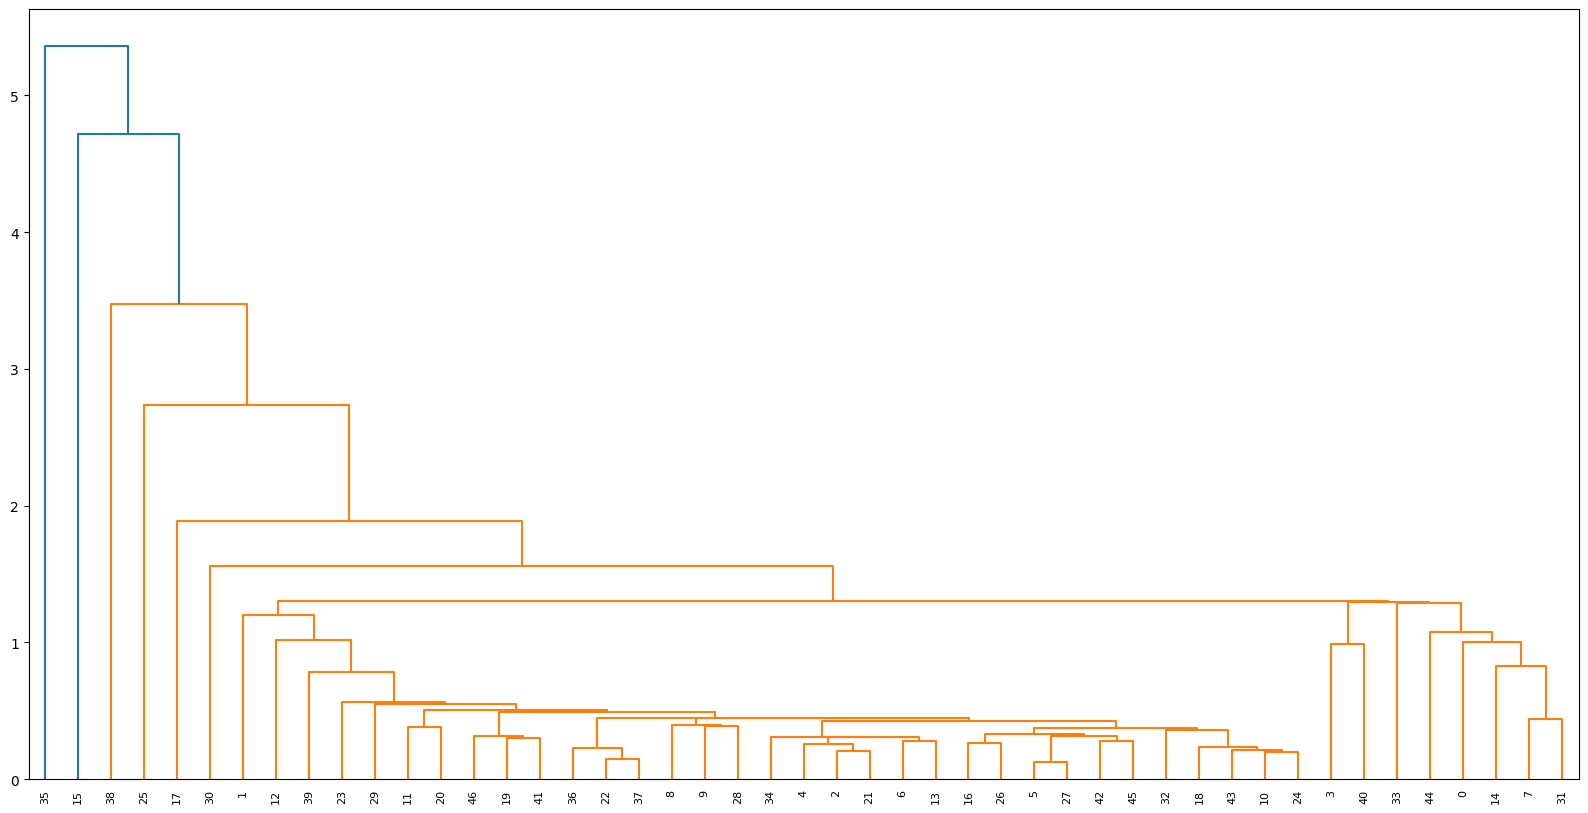

In [150]:
# Single linkage
plt.figure(figsize = (20,10))
mergings = linkage(data_df1, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

### Complete Linkage

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points.

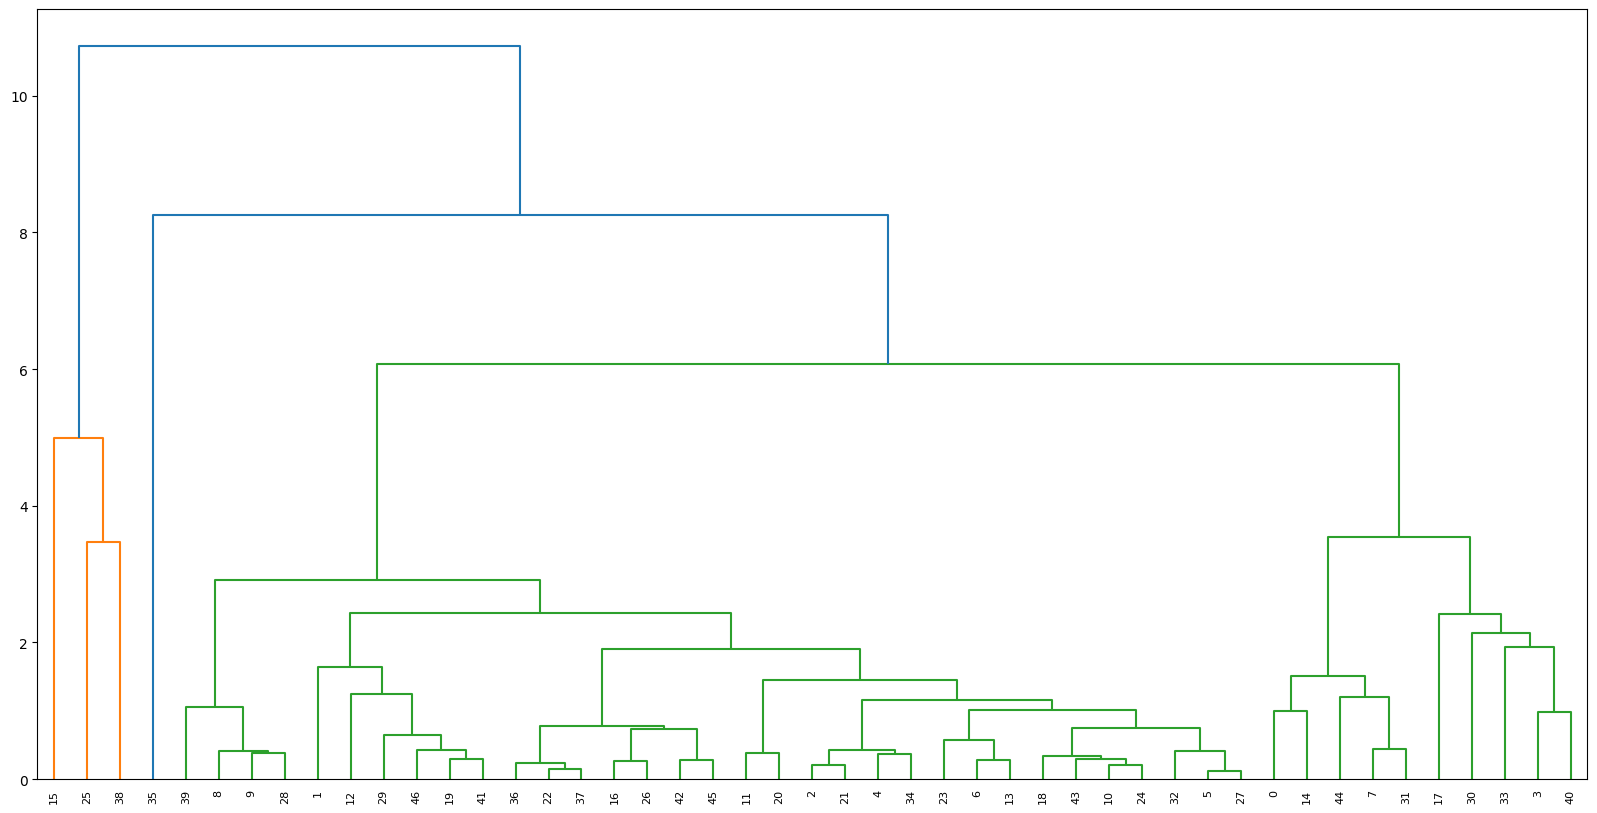

In [152]:
# Complete Linkage
plt.figure(figsize = (20,10))
mergings = linkage(data_df1, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [153]:
df_hc = new_df.copy()
df_hc = df_hc.drop('Cluster_Id',axis=1)
df_hc.head()

,country,child_mort,exports,health,imports,income,inflation,gdpp,continent
2,Algeria,27.3,1712.640,185.982,1400.440,12900,16.100,4460,Africa
3,Angola,119.0,2199.190,100.605,1514.370,5900,22.400,3530,Africa
17,Benin,111.0,180.404,31.078,281.976,1820,0.885,758,Africa
21,Botswana,52.5,2768.600,527.050,3257.550,13300,8.920,6350,Africa
25,Burkina Faso,116.0,110.400,38.755,170.200,1430,6.810,575,Africa


As the IMF and the UN, world is divided into 3 major classification for countries on scale of development.
- Developed countries
- Developing countries
- Least developed countries

In [154]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0])

In [155]:
# assign cluster labels
df_hc['Cluster_labels'] = cluster_labels
df_hc.head()

,country,child_mort,exports,health,imports,income,inflation,gdpp,continent,Cluster_labels
2,Algeria,27.3,1712.640,185.982,1400.440,12900,16.100,4460,Africa,0
3,Angola,119.0,2199.190,100.605,1514.370,5900,22.400,3530,Africa,0
17,Benin,111.0,180.404,31.078,281.976,1820,0.885,758,Africa,0
21,Botswana,52.5,2768.600,527.050,3257.550,13300,8.920,6350,Africa,0
25,Burkina Faso,116.0,110.400,38.755,170.200,1430,6.810,575,Africa,0


In [156]:
## Number of countries in each cluster
df_hc.Cluster_labels.value_counts(ascending=True)

Cluster_labels
2     1
1     3
0    43
Name: count, dtype: int64

It seems there are good number of countries in each clusters.

From the business understanding we have learnt that Child_Mortality, Income, Gdpp are some important factors which decides the development of any country. Hence, we will proceed with analyzing these 3 components to build some meaningful clusters.

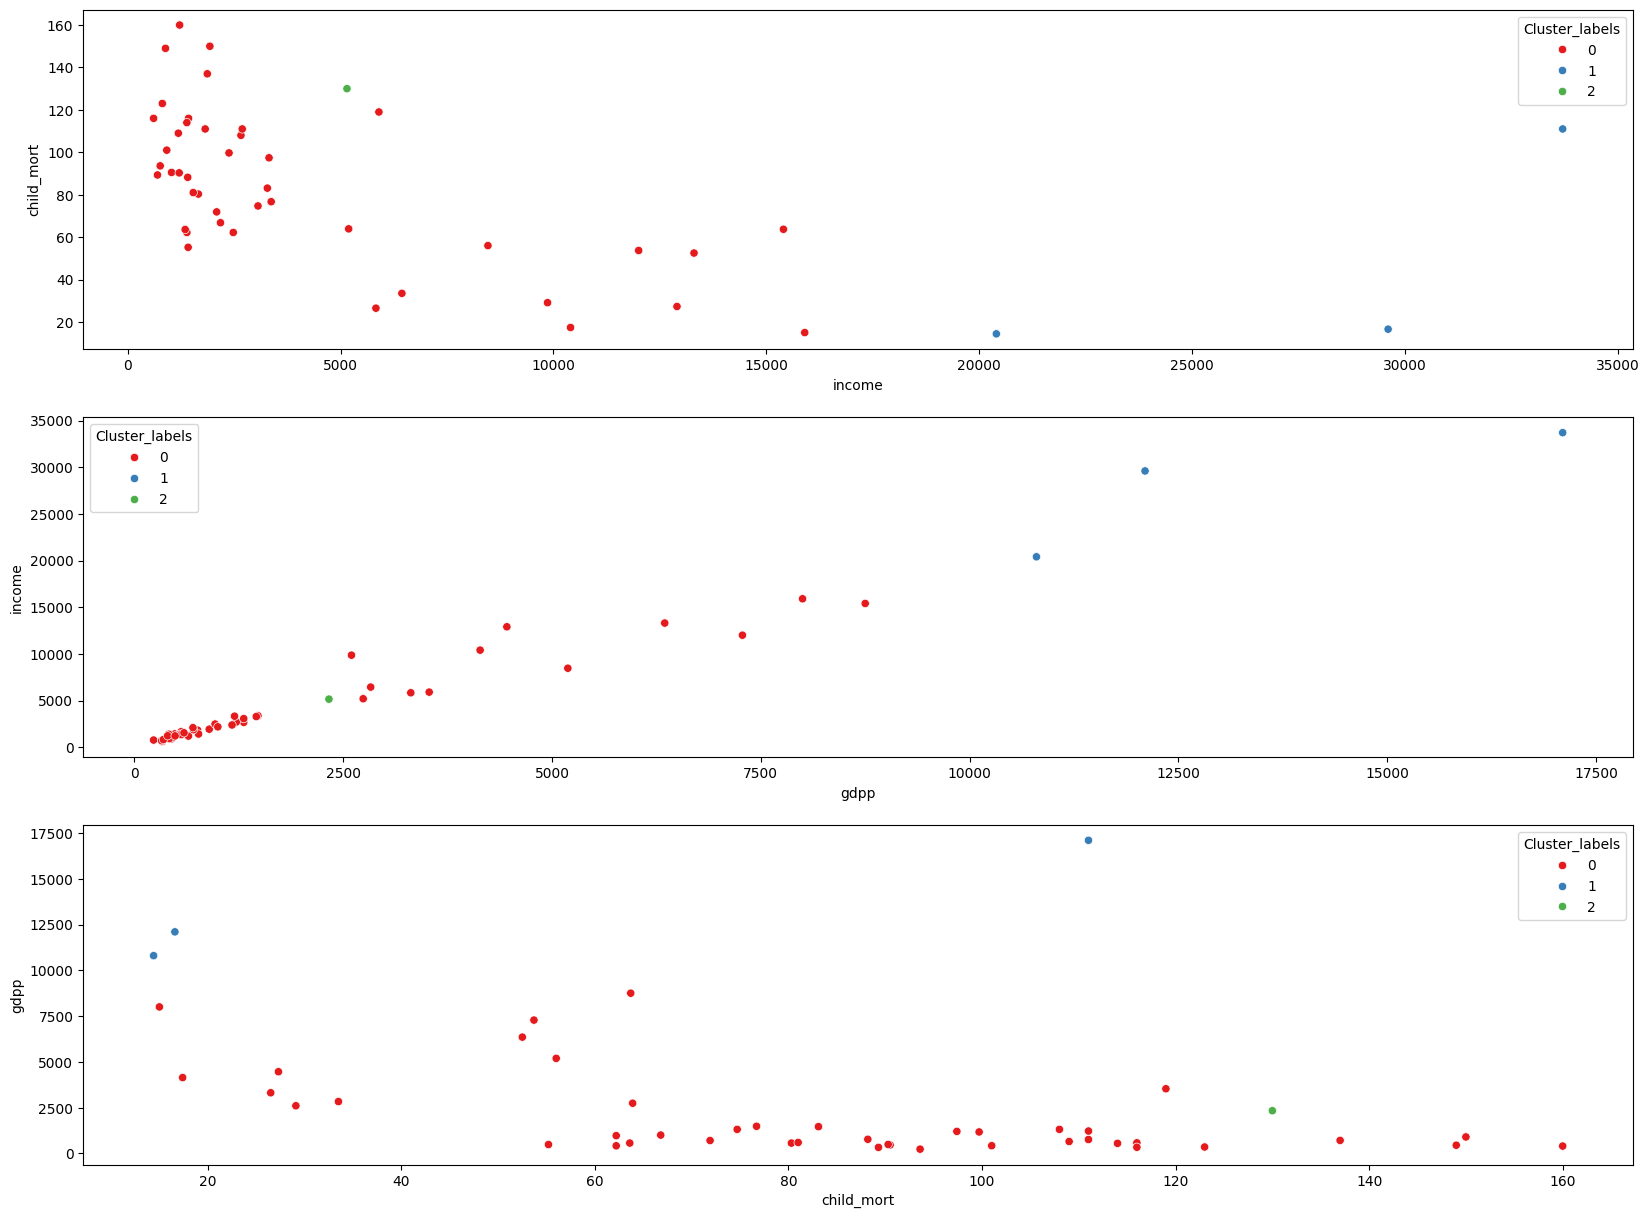

In [157]:
# Scatter plot on Original attributes to visualize the spread of the new_df

plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_labels',data = df_hc,legend='full',palette="Set1")
plt.subplot(3,1,2)
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_labels', data = df_hc,legend='full',palette="Set1")
plt.subplot(3,1,3)
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_labels', data =df_hc,legend='full',palette="Set1")
plt.show()

Clusters seems to be not properly

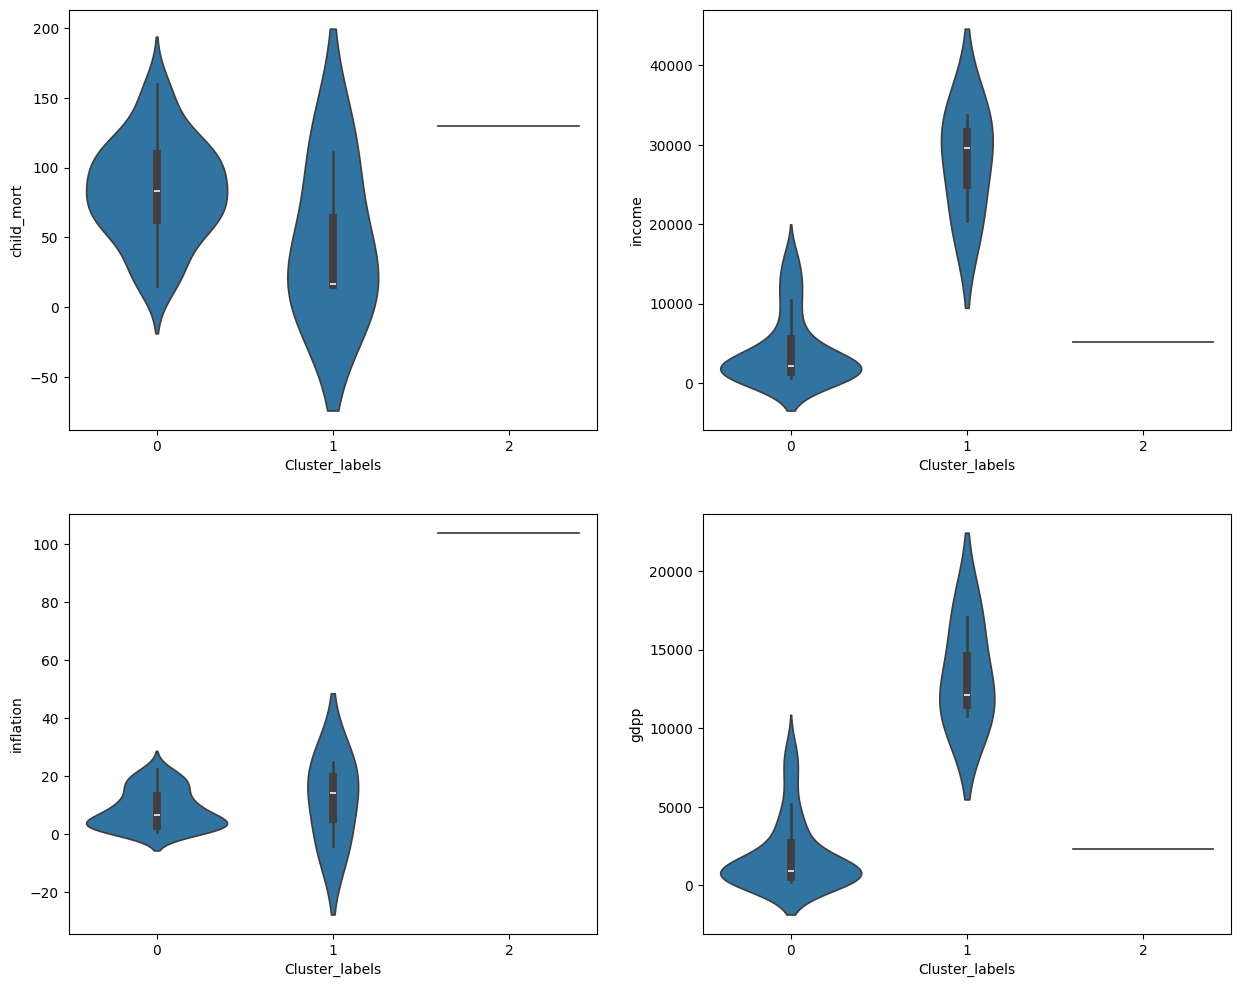

In [158]:
#Violin plot on Original attributes to visualize the spread of the new_df

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.violinplot(x = 'Cluster_labels', y = 'child_mort', data = df_hc,ax=axes[0][0])
sns.violinplot(x = 'Cluster_labels', y = 'income', data = df_hc,ax=axes[0][1])
sns.violinplot(x = 'Cluster_labels', y = 'inflation', data =df_hc,ax=axes[1][0])
sns.violinplot(x = 'Cluster_labels', y = 'gdpp', data =df_hc,ax=axes[1][1])
plt.show()

In [159]:
df_hc[['gdpp','income','child_mort','Cluster_labels']].groupby('Cluster_labels').mean()

,gdpp,income,child_mort
Cluster_labels,,,
0,1906.209302,4084.72093,83.472093
1,13333.333333,27900.00000,47.333333
2,2330.000000,5150.00000,130.000000


# Cluster Profiling

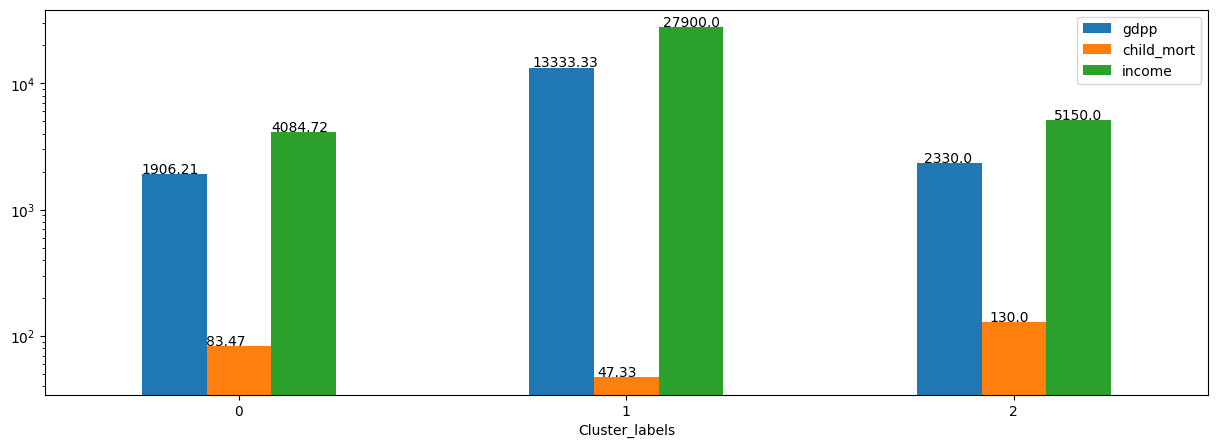

In [160]:
ax=df_hc[['gdpp','child_mort','income','Cluster_labels']].groupby('Cluster_labels').mean().plot(kind = 'bar',figsize = (15,5))

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.yscale('log')
plt.xticks(rotation=0)
plt.show();

In [161]:
df_hc[df_hc['Cluster_labels']==2].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
# They are Developed countries as per UN & IMF

,country,child_mort,exports,health,imports,income,inflation,gdpp,continent,Cluster_labels
113,Nigeria,130.0,589.49,118.131,405.42,5150,104.0,2330,Africa,2


In [162]:
df_hc[df_hc['Cluster_labels']==0].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()

# They are Least developed countries as per UN & IMF

,country,child_mort,exports,health,imports,income,inflation,gdpp,continent,Cluster_labels
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,399,Africa,0
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,897,Africa,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,446,Africa,0
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,708,Africa,0
112,Niger,123.0,77.256,17.9568,170.868,814,2.55,348,Africa,0


In [163]:
df_hc[df_hc['Cluster_labels']==1].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
# They are Developing countries as per UN & IMF



,country,child_mort,exports,health,imports,income,inflation,gdpp,continent,Cluster_labels
49,Equatorial Guinea,111.0,14671.8,766.08,10071.9,33700,24.90,17100,Africa,1
89,Libya,16.6,7937.6,469.48,5094.1,29600,14.20,12100,Africa,1
131,Seychelles,14.4,10130.4,367.20,11664.0,20400,-4.21,10800,Africa,1


# Final List of countries which are in need of the aid based on socio-economic factors.

In [164]:
FinalListbyHC=df_hc[df_hc['Cluster_labels']==0].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
FinalListbyHC['country']
FinalListbyHC.reset_index(drop=True).country[:5]

0                Sierra Leone
1                        Chad
2    Central African Republic
3                        Mali
4                       Niger
Name: country, dtype: object

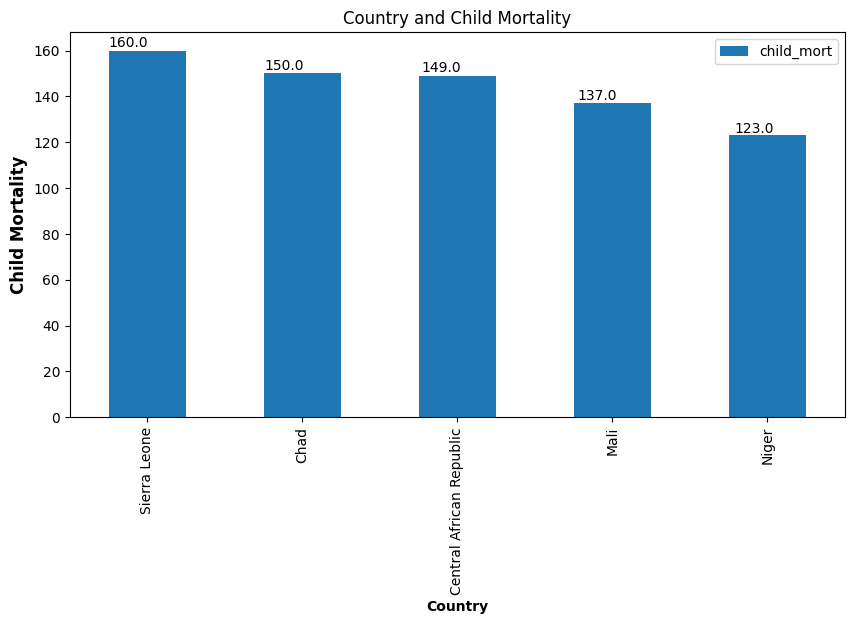

In [172]:
# BarPlot for Child Mortality of countries which are in need of aid
df_list_cm = pd.DataFrame(FinalListbyHC.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
ax=df_list_cm.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.show()

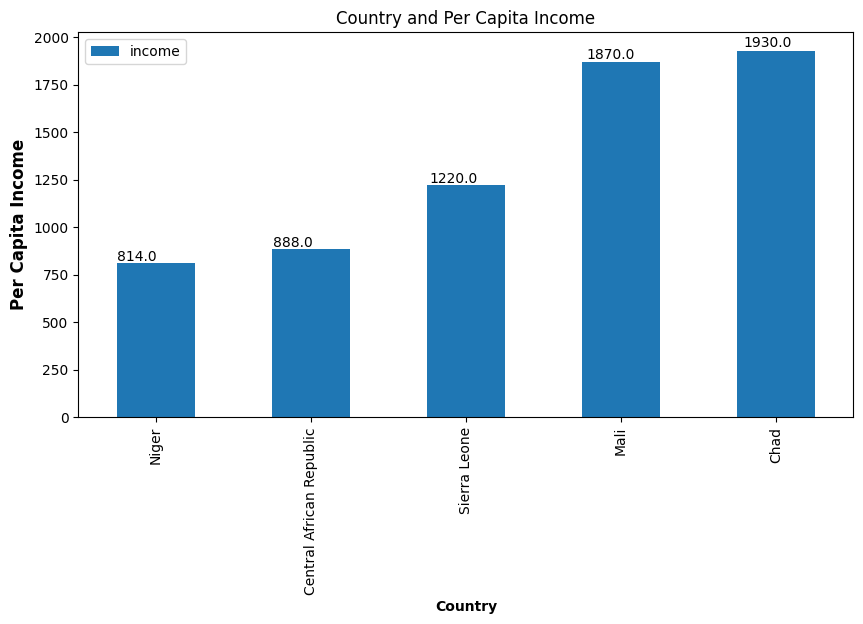

In [166]:
# BarPlot for Per Capita Income of countries which are in need of aid

df_list_in = pd.DataFrame(FinalListbyHC.groupby(['country'])['income'].mean().sort_values(ascending = True))
ax=df_list_in.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.show()

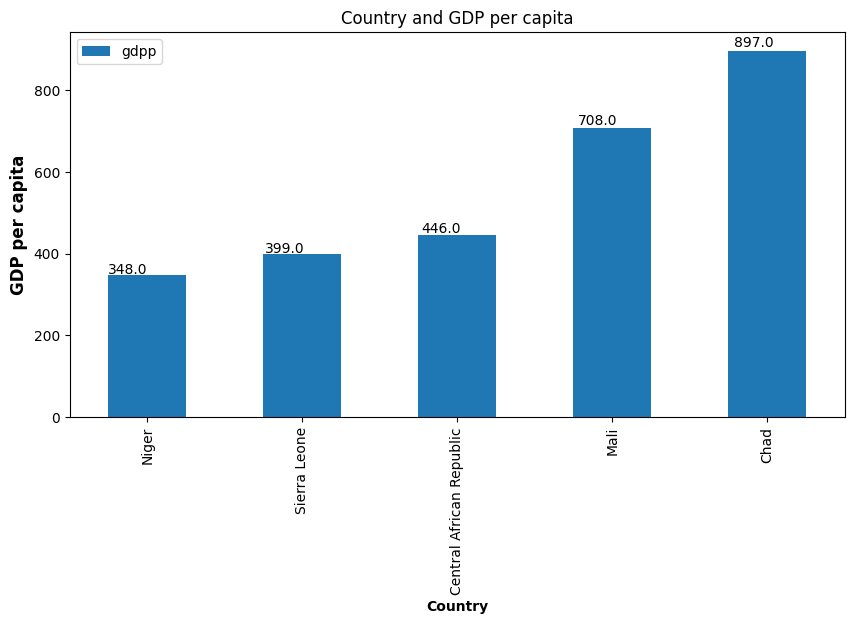

In [168]:
# BarPlot for GDP of countries which are in need of aid

df_list_gdp =pd.DataFrame(FinalListbyHC.groupby(['country'])['gdpp'].mean().sort_values(ascending = True))
ax=df_list_gdp.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.title('Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()

- We have analyzed both K-means and Hierarchial clustering and found clusters formed are identical.
- The time complexity of K Means is linear i.e. O(n) while that of hierarchical clustering is quadratic i.e. O(n2)
- Difference in execustion was not experienced as new_dfset was very small.
- K Means clustering requires prior knowledge of K i.e. no. of clusters we want to divide our new_df into. But, we can stop at whatever number of clusters we find appropriate in hierarchical clustering by interpreting the dendrogram
- So, we will proceed with the clusters formed by K-means and based on the information provided by the final clusters we will deduce the final list of countries which are in need of aid

# Final Analysis

In [169]:
## Number of countries in each cluster in K-Means 
new_df.Cluster_Id.value_counts(ascending=True)

Cluster_Id
1     3
2    10
0    34
Name: count, dtype: int64

In [ ]:
## Number of countries in each cluster for Hierarchical clustering
df_hc.Cluster_labels.value_counts(ascending=True)

Cluster_labels
2    21
0    50
1    96
Name: count, dtype: int64

Though Required Clusters have same number of countries, but for Hierarchical clustering has more execution time compared to K-Mean

K-mean is an ideal algorithm for this problem statement. 

## Final List of countries which are in need of the aid based on socio-economic factors.

In [171]:
FinalListbyKMean=new_df_copy[new_df_copy['Cluster_Id']==2].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
FinalListbyKMean['country']
FinalListbyKMean.reset_index(drop=True).country[:5]

KeyError: 'Cluster_Id'

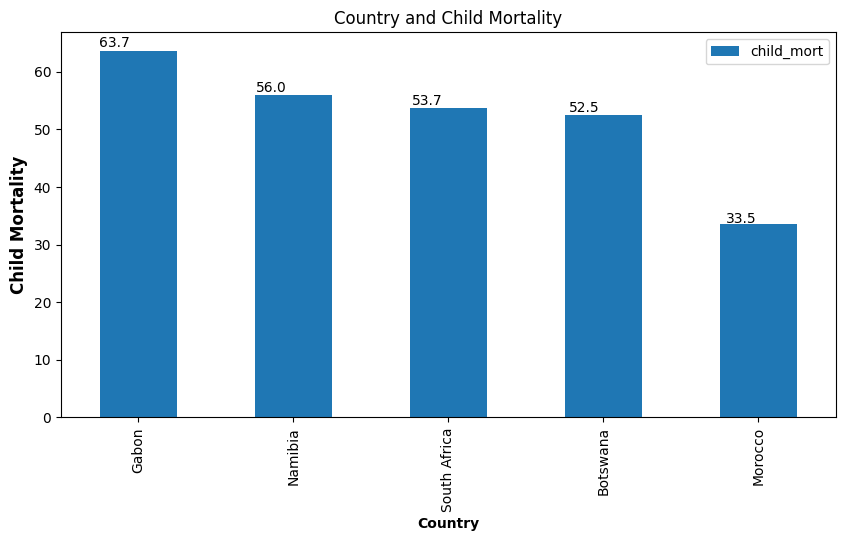

In [174]:
# BarPlot for Child Mortality of countries which are in need of aid
df_list_cm = pd.DataFrame(FinalListbyKMean.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
ax=df_list_cm.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.show()

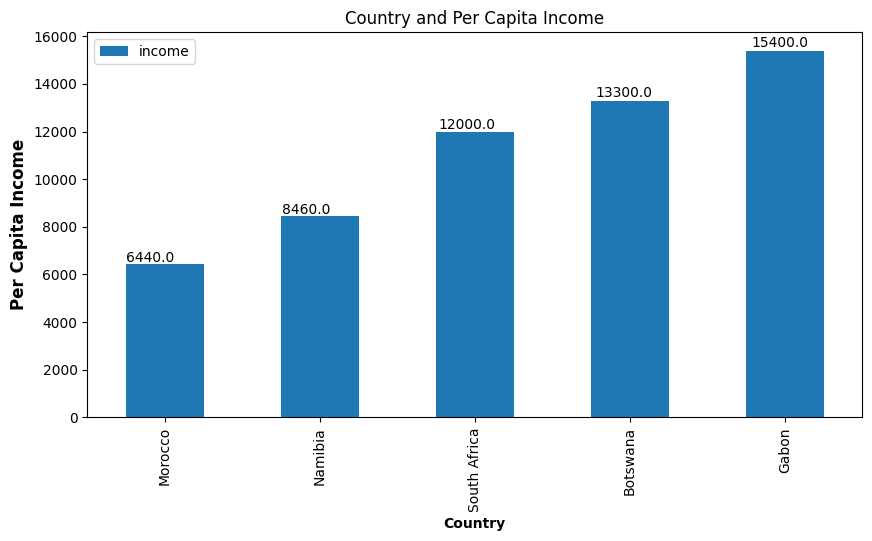

In [175]:
# BarPlot for Per Capita Income of countries which are in need of aid

df_list_in = pd.DataFrame(FinalListbyKMean.groupby(['country'])['income'].mean().sort_values(ascending = True))
ax=df_list_in.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.show()

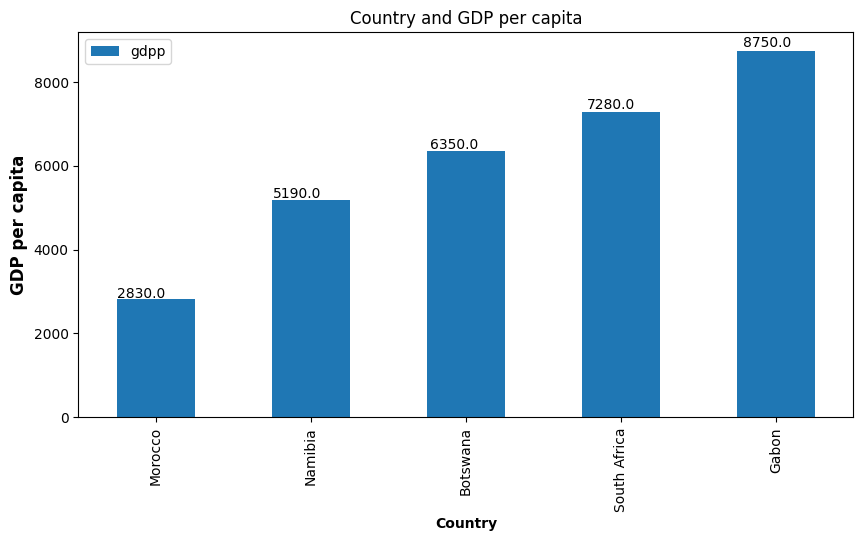

In [176]:
# BarPlot for GDP of countries which are in need of aid

df_list_gdp =pd.DataFrame(FinalListbyKMean.groupby(['country'])['gdpp'].mean().sort_values(ascending = True))
ax=df_list_gdp.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.title('Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()

# Conclusion

We recommend to use K-means for clustering of countries and then later we identified few factors like child mortality, income etc which plays a vital role in deciding the development status of the country and builded clusters of countries based on that. Based on those clusters we have identified the below list of countries which are in dire need of aid. The list of countries are subject to change as it is based on the few factors like Number of components chosen, Number of Clusters chosen, Clustering method used etc.which we have used to build the model.

In [177]:
#FinalList with K-Means
FinalListbyKMean.reset_index(drop=True).country

0           Gabon
1         Namibia
2    South Africa
3        Botswana
4         Morocco
Name: country, dtype: object

In [179]:
# Final countries list with Hierarchical clustering
FinalListbyHC.reset_index(drop=True).country

0                Sierra Leone
1                        Chad
2    Central African Republic
3                        Mali
4                       Niger
Name: country, dtype: object

In [180]:
# Final countries list
FinalListbyKMean.reset_index(drop=True).country

0           Gabon
1         Namibia
2    South Africa
3        Botswana
4         Morocco
Name: country, dtype: object